# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
!pip install scikit-learn==1.3.1 seaborn==0.13.1 matplotlib==3.8.0 numpy==1.25.2 pandas==2.2.2 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user

In [ ]:
!pip install statsmodels

In [ ]:
!pip install scikit-optimize

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imblearn==0.12.0 xgboost==2.0.3 -q --user
# !pip install --upgrade -q threadpoolctl

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again*.

In [ ]:
# Data processing packages
import numpy as np
import pandas as pd

# Graphs for EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Models to try for this problem
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier
)
from xgboost import XGBClassifier,XGBRFClassifier

# Metrics to evaluate the models
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    classification_report,
    make_scorer
)

# Preprocessing - Imputation, Data split, Hypertuning Searches, Over and Undersampling
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score

from sklearn.preprocessing import OneHotEncoder,StandardScaler

from sklearn.impute import SimpleImputer

from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)
# To show all columns
pd.set_option("display.max_columns", None)
# To supress warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the file from Google drive
data = pd.read_csv('/content/drive/MyDrive/MyGreatLearning/2-Advanced_ML/Project/BankChurners.csv')

In [ ]:
#Making a copy in which all processing is done
df = data.copy()

## Data Overview

- Observations
- Sanity checks

### Checking the shape of the dataset

In [ ]:
#Shape
df.shape

(10127, 21)

There are 10127 rows and 21 columns

### Load rows to see how data looks like

In [ ]:
# Load first 10 rows
df.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.000,1247,2763.000,1.376,1088,24,0.846,0.311
6,810347208,Existing Customer,51,M,4,NaN,Married,$120K +,Gold,46,6,1,3,34516.000,2264,32252.000,1.975,1330,31,0.722,0.066
7,818906208,Existing Customer,32,M,0,High School,NaN,$60K - $80K,Silver,27,2,2,2,29081.000,1396,27685.000,2.204,1538,36,0.714,0.048
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.000,2517,19835.000,3.355,1350,24,1.182,0.113
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656.000,1677,9979.000,1.524,1441,32,0.882,0.144


In [ ]:
# Load last 10 rows
df.tail(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10117,712503408,Existing Customer,57,M,2,Graduate,Married,$80K - $120K,Blue,40,6,3,4,17925.000,1909,16016.000,0.712,17498,111,0.820,0.106
10118,713755458,Attrited Customer,50,M,1,NaN,NaN,$80K - $120K,Blue,36,6,3,4,9959.000,952,9007.000,0.825,10310,63,1.100,0.096
10119,716893683,Attrited Customer,55,F,3,Uneducated,Single,abc,Blue,47,4,3,3,14657.000,2517,12140.000,0.166,6009,53,0.514,0.172
10120,710841183,Existing Customer,54,M,1,High School,Single,$60K - $80K,Blue,34,5,2,0,13940.000,2109,11831.000,0.660,15577,114,0.754,0.151
10121,713899383,Existing Customer,56,F,1,Graduate,Single,Less than $40K,Blue,50,4,1,4,3688.000,606,3082.000,0.570,14596,120,0.791,0.164
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


There are NaN columns, unique Id column ,categorical cols and numerical cols.

### Info about Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

* There is a Unique ID column which can be dropped
* There are multiple categorical variables which needs to be encoded - Attrition_Flag,Gender,Education_Level,Marital_Status,Income_category,Card_category - Need to convert this into category type
* Rest of them are numerical in nature.
* There are 2 columns containing null values which needs to be treated - Education_Level and Marital_Status - Need to be imputed

### Drop CLIENTNUM Column

In [ ]:
df.drop("CLIENTNUM",axis=1,inplace=True) # Unique in nature so dropped.

### Check for Duplicates

In [ ]:
df.duplicated().sum()

0

There are no duplicates after dropping the unique ID

### Check for missing values

In [ ]:
df.isnull().sum()[(df.isnull().sum() > 0)]

,0
Education_Level,1519
Marital_Status,749


Education_Level has 1519 missing values and Marital_Status has 749 missing values

### Statistical summary of the dataset

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Attrition_Flag,10127,2,Existing Customer,8500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Age,10127.000,NaN,NaN,NaN,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Gender,10127,2,F,5358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependent_count,10127.000,NaN,NaN,NaN,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Education_Level,8608,6,Graduate,3128,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,9378,3,Married,4687,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income_Category,10127,6,Less than $40K,3561,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Card_Category,10127,4,Blue,9436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Months_on_book,10127.000,NaN,NaN,NaN,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,NaN,NaN,NaN,3.813,1.554,1.000,3.000,4.000,5.000,6.000


Out of 10127 rows,
* Categorical columns - Attrition_Flag,Gender,Education_Level,Marital_Status,Income_category,Card_category
   * Attrition Flag - 2 unique values in 8500 rows with Existing Customer and rest with other value.
   * Gender - 2 unique values with Female leading in 5358 rows.
   * Education level - 6 Unique values with Graduate being atop in 3128 rows.
   * Marital Status - 3 unique values with Married leading in 4687 rows
   * Income category - 6 unique values with "Less than 40K" in 3561 rows.
   * Card category - 4 unique values with Blue as leading in 9436 rows.
* Numerical columns Distribution -
   * Customer Age - Range - 26-73 Years, Mean - 46.3, Median - 46, Std Deviation - 8 Years. Mean is close to Median, normal distribution.
   * Dependent count - Range - 0-5, Mean - 2.34, Median - 2, Std Deviation - 1.299. Mean is a bit higher than Median, normal or a bit right skewed distribution.
   * Months on book - Mean - 35.9,Median - 36 MOnths,Std Deviation - 7.98,Range - 13-56 Months, Mean is closer to Median, normal distribution
   * Total Relationship Count - Mean - 3.8,Std Deviation - 1.55, Median - 4,Range - 1-6. Mean is a bit lesser than Median, normal or a bit left skewed distribution
   * Months Inactive 12 mon - Mean - 2.34,Std Deviation - 1.01,Median - 2.0, Range - 0-6 , Mean is a bit higher than Median, normal distribution or a bit right skewed distribution
   * Contacts Count 12 mon - Mean - 2.455,Std Deviation - 1.106,Median - 2.0, Range - 0-6 , Mean is a bit higher than Median, normal distribution or a bit right skewed distribution
   * Credit Limit - Mean -  USD 8631.9,Std Deviation -  USD 9088,Median -  USD 4549.0, Range - 1438-34516 , Mean is a lot higher than Median, right skewed distribution with potential outliers.
   * Total Revolving Bal - Mean -  USD 1162,Std Deviation -  USD 814,Median -  USD 1276, Range - 0-2517 , Mean is a bit lower than Median, normal distribution or a bit left skewed distribution
   * Avg Open To Buy - Mean -  USD 7469,Std Deviation -  USD 9090,Median -  USD 3474.0, Range - 3-34516 , Mean is a lot higher than Median, right skewed distribution with potential outliers.
   * Total Amt Chng Q4 Q1 - Mean - 0.76,Std Deviation - 0.2,Median - 0.736, Range - 0-3.397 , Mean is a bit higher than Median, normal distribution or a bit right skewed distribution
   * Total Trans Amt - Mean -  USD 4404,Std Deviation -  USD 3397,Median -  USD 3899.0, Range - 510-18484 , Mean is higher than Median, right skewed distribution with potential outliers.
   * Total Trans Ct - Mean - 64.8,Std Deviation - 23.4,Median - 67, Range - 10-139 , Mean is a bit lesser than Median, normal distribution or a bit left skewed distribution
   * Total Ct Chng Q4 Q1 - Mean - 0.712,Std Deviation - 0.238,Median - 0.7, Range - 0-3.714 , Mean is a bit higher than Median, normal distribution or a bit right skewed distribution
   * Avg Utilization Ratio - Mean - 0.275,Std Deviation - 0.276,Median - 0.17, Range - 0-0.999 , Mean is  higher than Median, right skewed distribution

In [ ]:
for col in df.select_dtypes(include='object').columns:
  print(col," Value counts:",df[col].value_counts())
  print("-"*50)

Attrition_Flag  Value counts: Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64
--------------------------------------------------
Gender  Value counts: Gender
F    5358
M    4769
Name: count, dtype: int64
--------------------------------------------------
Education_Level  Value counts: Education_Level
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64
--------------------------------------------------
Marital_Status  Value counts: Marital_Status
Married     4687
Single      3943
Divorced     748
Name: count, dtype: int64
--------------------------------------------------
Income_Category  Value counts: Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: count, dtype: int64
--------------------------------------------------
Card_Cate

* Attrition_Flag - target Flag - Imbalanced Dataset
* Gender has 2 distinct values with 53:47 ratio
* Education has 6 distinct values starting from Uneducated to post doctorate with Graduate being the most prevalent.
* Marital Status has 3 values with Married being at the top.
* Income category, though it doesn't have missing values, it has a category called abc which needs to be imputed or put into meaningful bucket and "Less than 40K USD" leads.
* Blue category card customers lead the credit card type.


### Model should focus on identifying the customers who will churn, so, item of importance is encoded as 1 so, recall can correctly identify these customers who can be enticed with some discounts/offers/programs upgrade.

In [ ]:
dict = {"Existing Customer" : 0,"Attrited Customer": 1}
df.Attrition_Flag = df.Attrition_Flag.map(dict)

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

Customer_Age

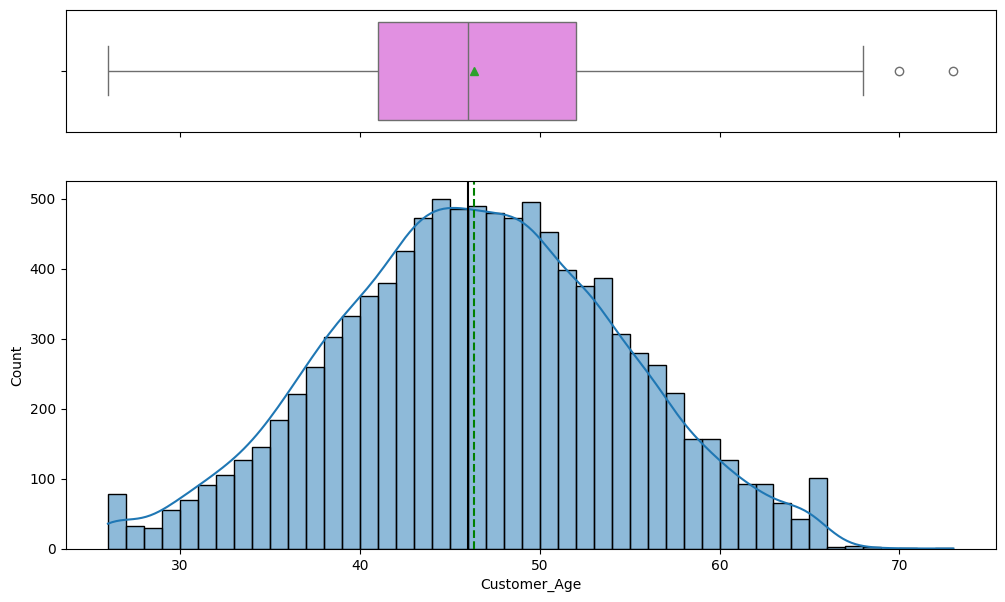

In [ ]:
histogram_boxplot(df,"Customer_Age",kde=True)

* Approximately normally distributed, witha tail on the right side, indicating couple of outliers as shown in Box plot.
* Range - 26-73 Years, Mean - 46.3, Median - 46, Std Deviation - 8 Years. Mean is close to Median, normal distribution

Months_on_book

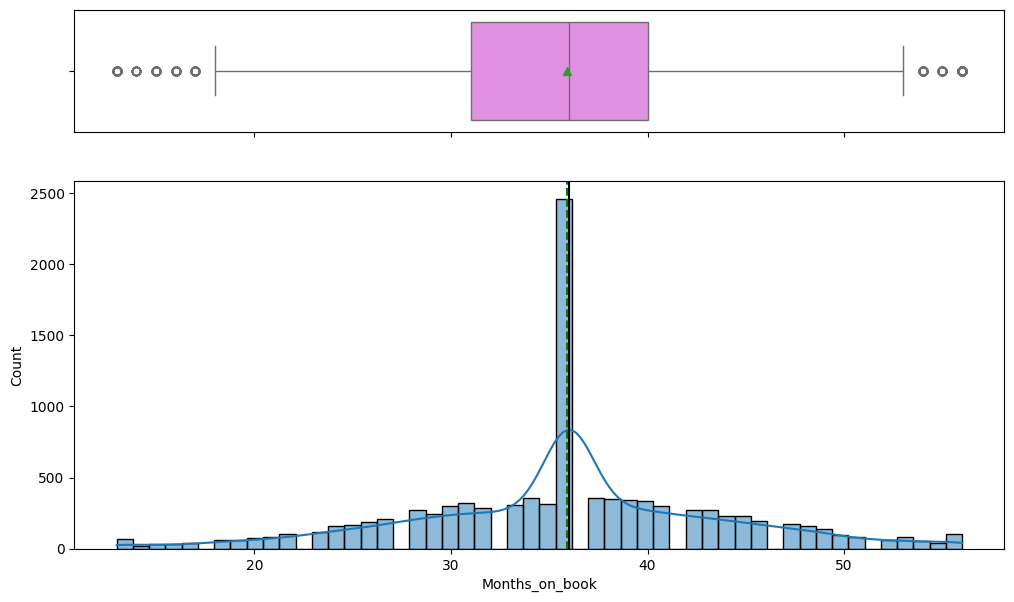

In [ ]:
histogram_boxplot(df,"Months_on_book",kde=True)

* Normal distribution with tails on either end indicating potential outliers on both sides.
* Majority of customers have peak value ~36 Months of relationship with the bank.
* Mean - 35.9,Median - 36 MOnths,Std Deviation - 7.98,Range - 13-56 Months, Mean is closer to Median, normal distribution

Credit_Limit

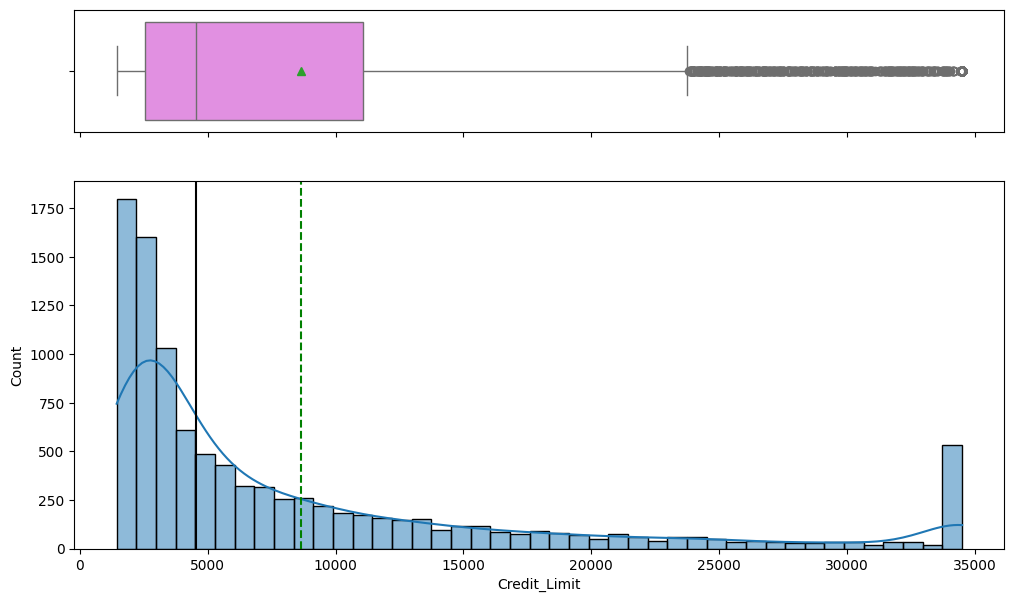

In [ ]:
histogram_boxplot(df,"Credit_Limit",kde=True)

* Highly right skewed distribution with lot of outliers for credit limit higher than 24,000
* Mean - USD 8631.9,Std Deviation - USD 9088,Median - USD 4549.0, Range - 1438-34516 , Mean is a lot higher than Median, right skewed distribution with potential outliers.

Total_Revolving_Bal

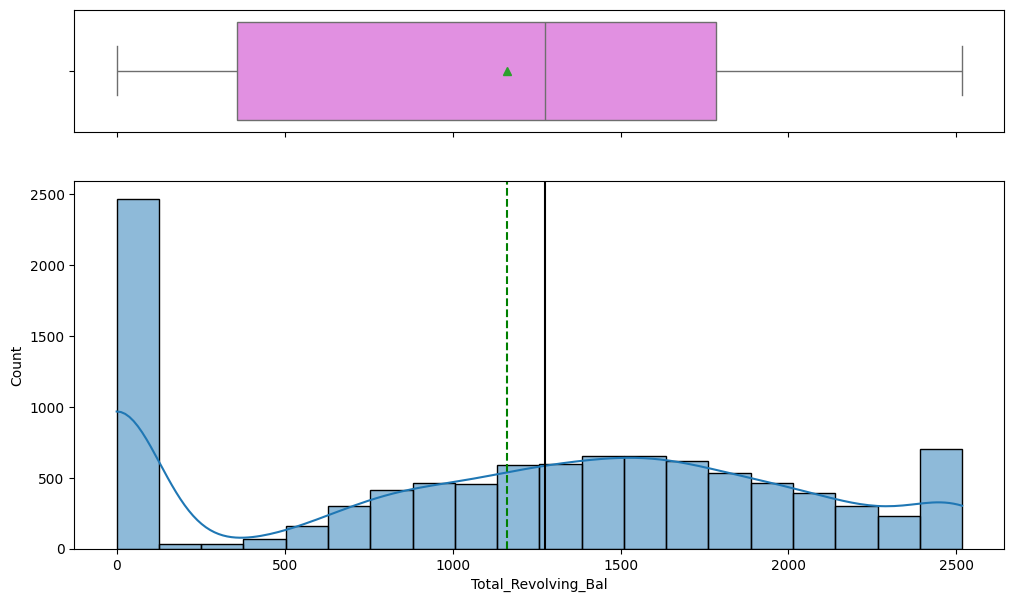

In [ ]:
histogram_boxplot(df,"Total_Revolving_Bal",kde=True)

* Majority of the customers have 0 revolving balance , meaning they pay their bill correctly without rolling it over.
* Mean - USD 1162,Std Deviation - USD 814,Median - USD 1276, Range - 0-2517 , Mean is a bit lower than Median, normal distribution or a bit left skewed distribution

Avg_Open_To_Buy

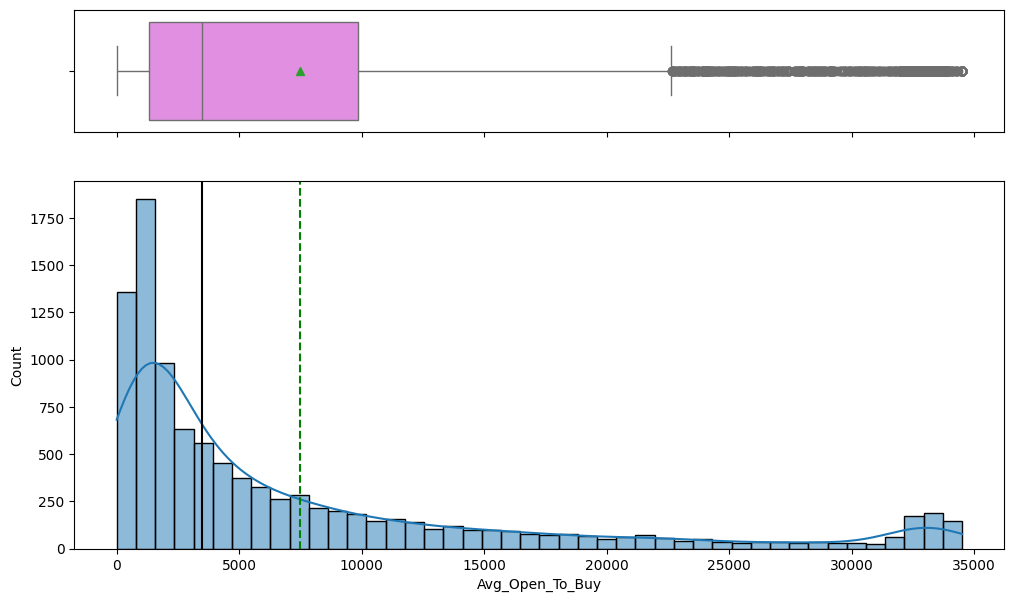

In [ ]:
histogram_boxplot(df,"Avg_Open_To_Buy",kde=True)

* Right skewed distribution with a long tail at the right esp higher than 22.5K, there are lot of outliers
* Mean - USD 7469,Std Deviation - USD 9090,Median - USD 3474.0, Range - 3-34516 , Mean is a lot higher than Median, right skewed distribution with potential outliers.

Total_Amt_Chng_Q4_Q1

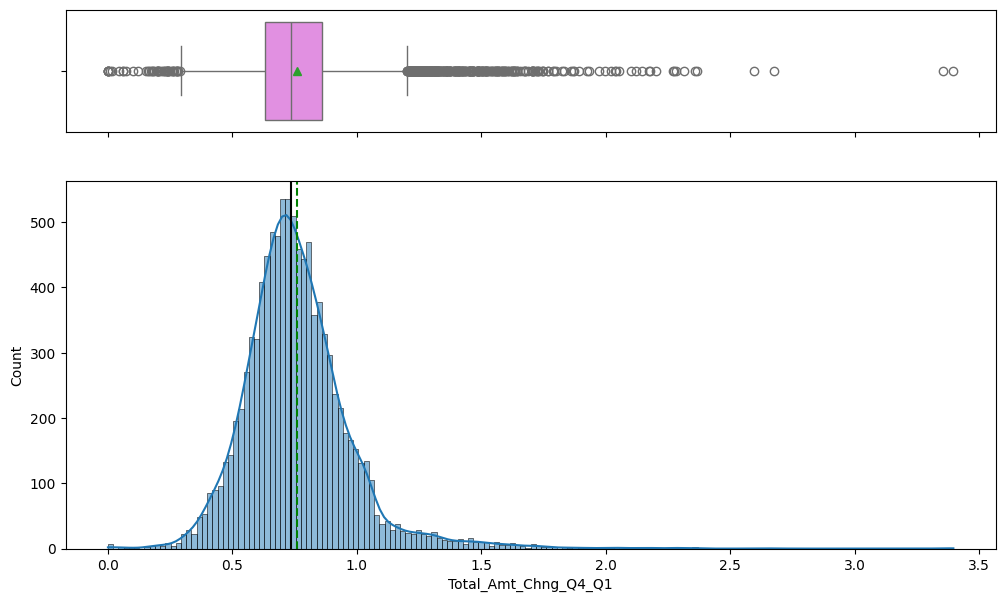

In [ ]:
histogram_boxplot(df,"Total_Amt_Chng_Q4_Q1",kde=True)

* Approximately normal or bit right skewed with outliers on both left and right with right having more outliers than the left. Data < ~0.3 and Data > ~1.2 are approximately looking like outliers.
* Mean - 0.76,Std Deviation - 0.2,Median - 0.736, Range - 0-3.397 , Mean is a bit higher than Median, normal distribution or a bit right skewed distribution

Total_Trans_Amt

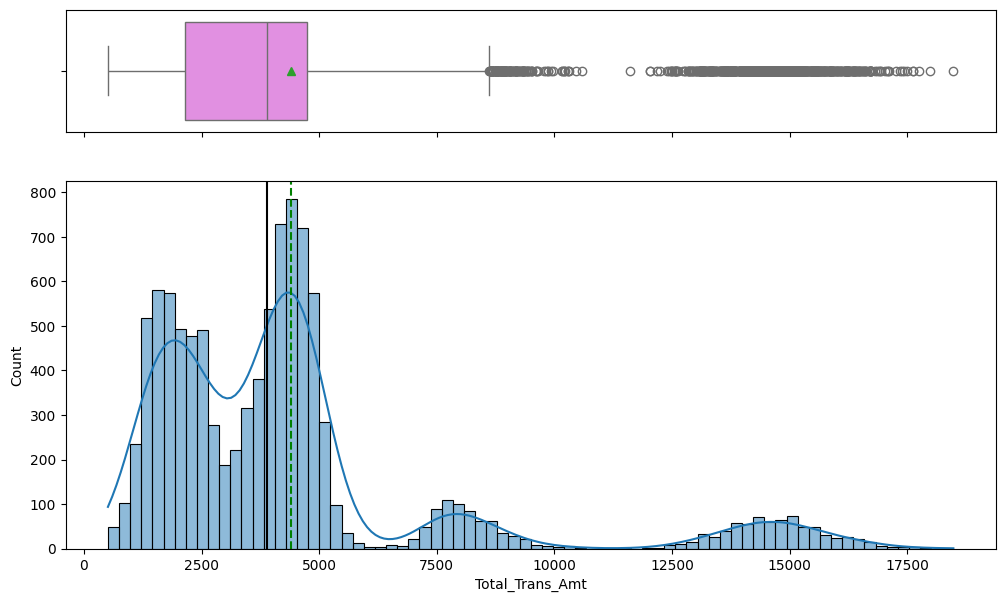

In [ ]:
histogram_boxplot(df,"Total_Trans_Amt",kde=True)

* Multi modal right skewed distribution with lot of outliers for transaction amount > ~8750 USD.
* Higher no of Customers seem to be transacting in the range ~ 1250-2500 USD range,~ 3800-5000 range, ~ 7500-8750 USD range,~ 13750-16K USD range. This indicates multi modal distribution pattern amongst the transaction Amount.
* Mean - USD 4404,Std Deviation - USD 3397,Median - USD 3899.0, Range - 510-18484 , Mean is higher than Median, right skewed distribution with potential outliers.

Total_Trans_Ct

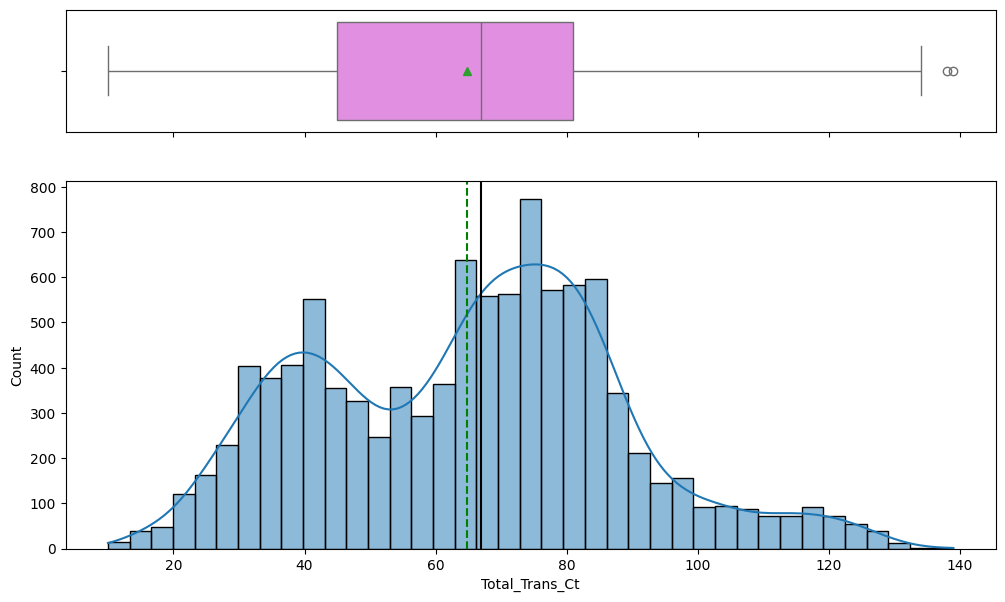

In [ ]:
histogram_boxplot(df, "Total_Trans_Ct",kde=True)

* Left skewed with a long tail on the left but has outliers on right hand side end above 135
* Also, has multi modal relation ship with transaction counts surging up higher around 40-45, 60-80 indicating common patterns on number of transactions done by the customer.
* Mean - 64.8,Std Deviation - 23.4,Median - 67, Range - 10-139 , Mean is a bit lesser than Median, normal distribution or a bit left skewed distribution

Total_Ct_Chng_Q4_Q1

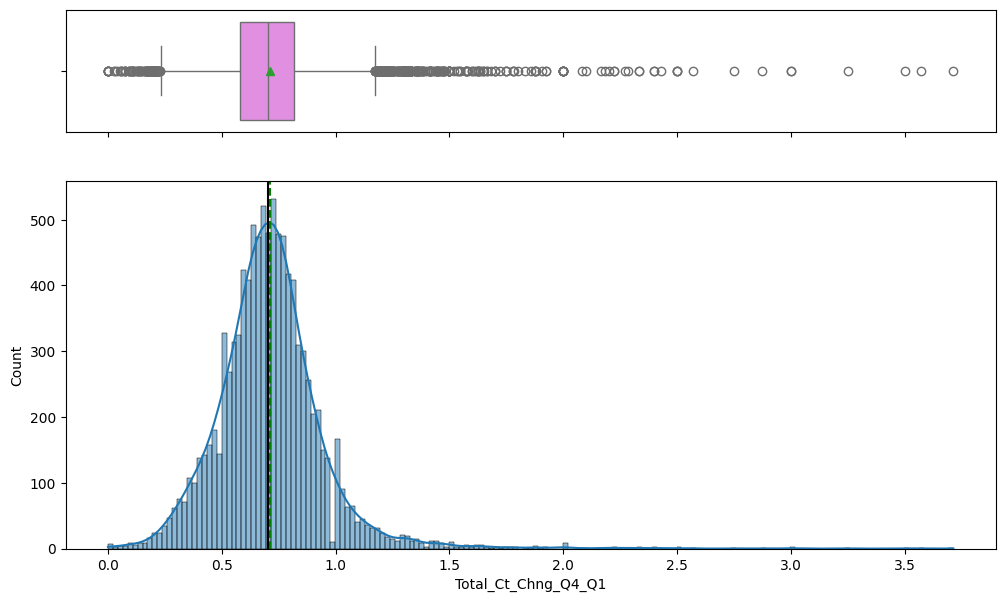

In [ ]:
histogram_boxplot(df,"Total_Ct_Chng_Q4_Q1",kde=True)

* Normal distribution with outliers on both ends but on right side, being significantly higher than that left.
* Mean - 0.712,Std Deviation - 0.238,Median - 0.7, Range - 0-3.714 , Mean is a bit higher than Median, normal distribution or a bit right skewed distribution

Avg_Utilization_Ratio

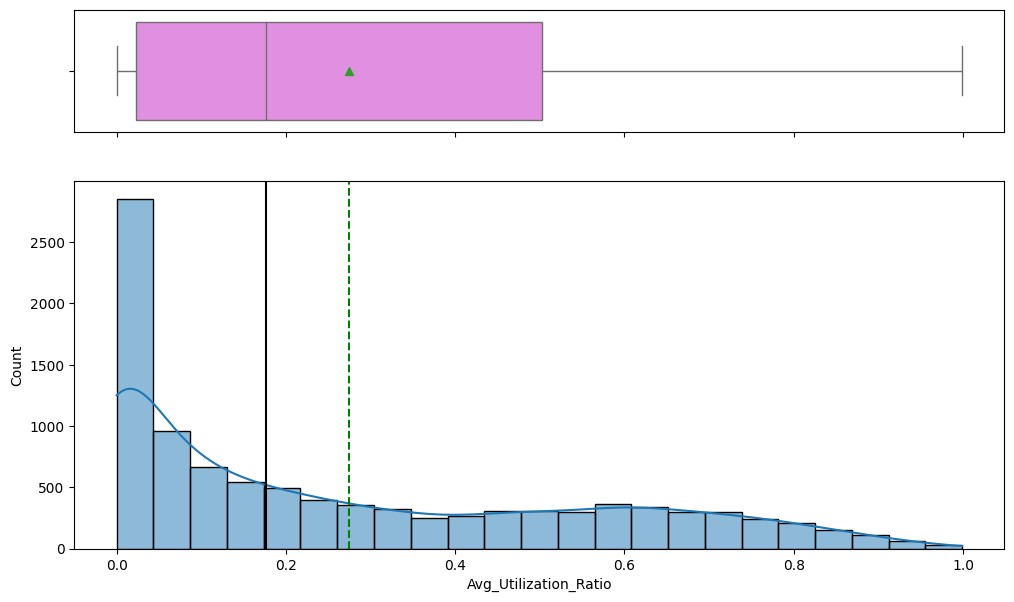

In [ ]:
histogram_boxplot(df,"Avg_Utilization_Ratio",kde=True)

* Highly right skewed with a long tail on the right and with peak at 0 indicating the customers haven't spent much of the available credit.
* Mean - 0.275,Std Deviation - 0.276,Median - 0.17, Range - 0-0.999 , Mean is higher than Median, right skewed distribution

Dependent_count

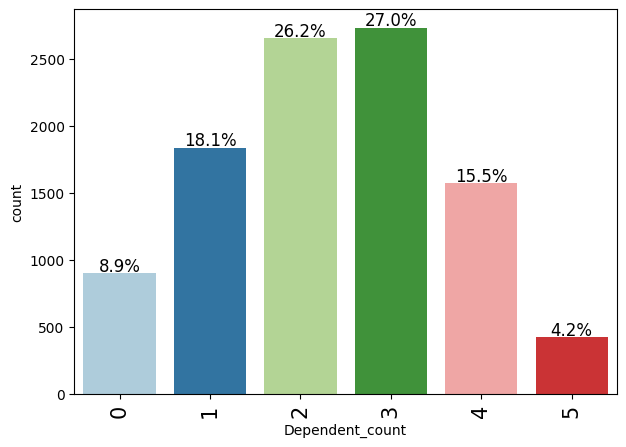

In [ ]:
labeled_barplot(df,"Dependent_count",perc=True)

* Customers with 2 / 3 Dependents account for majority while 1 / 4 dependents occupy the next lead. % distributions are shown above.
* Range - 0-5, Mean - 2.34, Median - 2, Std Deviation - 1.299. Mean is a bit higher than Median, normal or a bit right skewed distribution.

Total_Relationship_Count

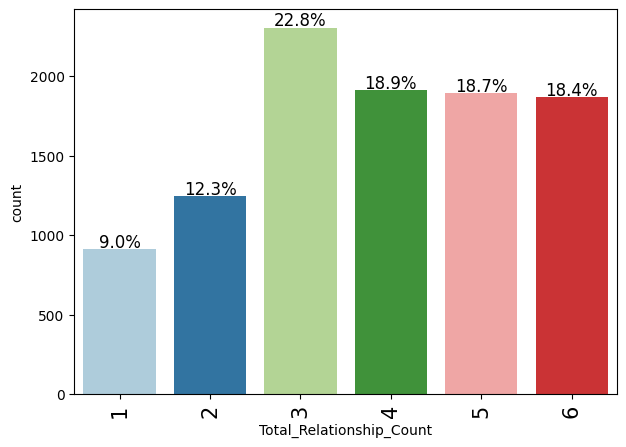

In [ ]:
labeled_barplot(df,"Total_Relationship_Count",perc=True)

* Max no. of products held by customer are 3 for around ~ 23% of customers. Next in line would be 4/5/6 products held up by 18.9%,18,7%,18.4% of customers respectively.
* Mean - 3.8,Std Deviation - 1.55, Median - 4,Range - 1-6. Mean is a bit lesser than Median, normal or a bit left skewed distribution

Months_Inactive_12_mon

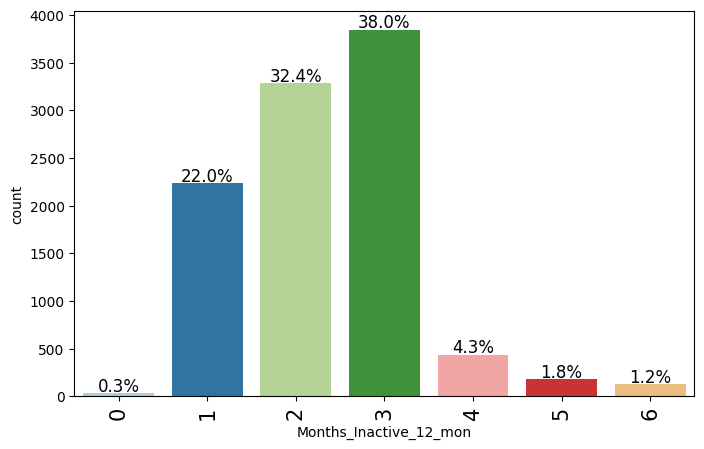

In [ ]:
labeled_barplot(df,"Months_Inactive_12_mon",perc=True)

* No. of months inactive in last 12 months peaks at 3 months for 38% of customers, with 2 months for 32% of customers and with 1 month of 22% of customers
* If possible, Need to check what factors influence these inactivity periods.

Contacts_Count_12_mon

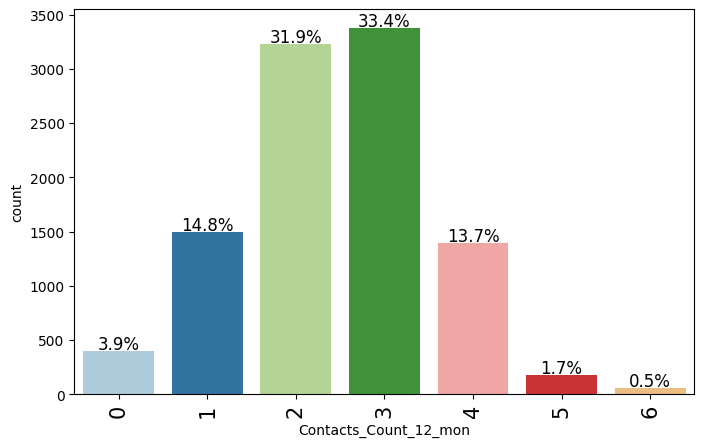

In [ ]:
labeled_barplot(df,"Contacts_Count_12_mon",perc=True)

* Similar to inactive periods, no of contacts between the bank and customers also peak at 3 months with 33.4%, with next frequent at 32% for 2 months and 15% for 1 month

Gender

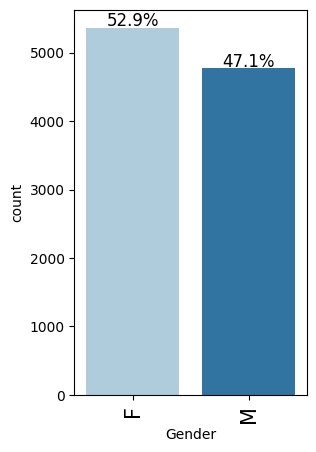

In [ ]:
labeled_barplot(df,"Gender",perc=True)

Around 53% are female and 47% are male customers in this bank.

Education_Level

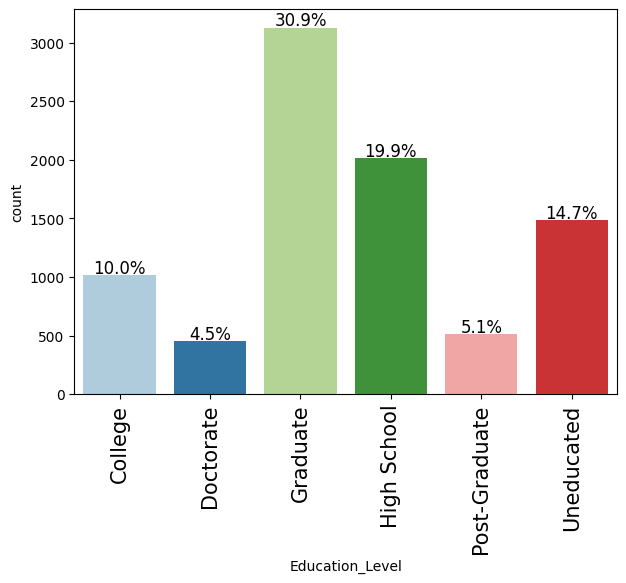

In [ ]:
labeled_barplot(df,"Education_Level",perc=True)

* Leading number of customers around 31% are college graduates, while next best are around 20% high school passouts and quite close to 15% are uneducated.

Marital_Status

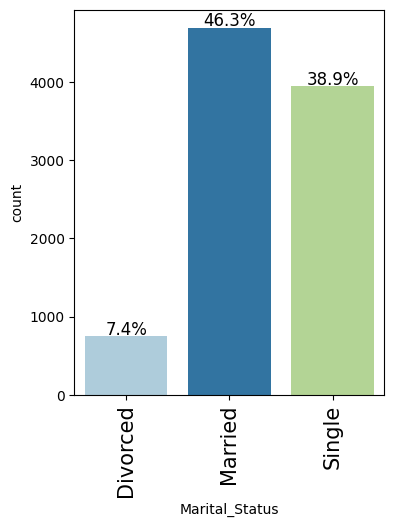

In [ ]:
labeled_barplot(df,"Marital_Status",perc=True)

* Aournd 46% of customers are married while 39% are single and around 7% are divorced.
* Married segment have higher credit card subscription rate.

Income_Category

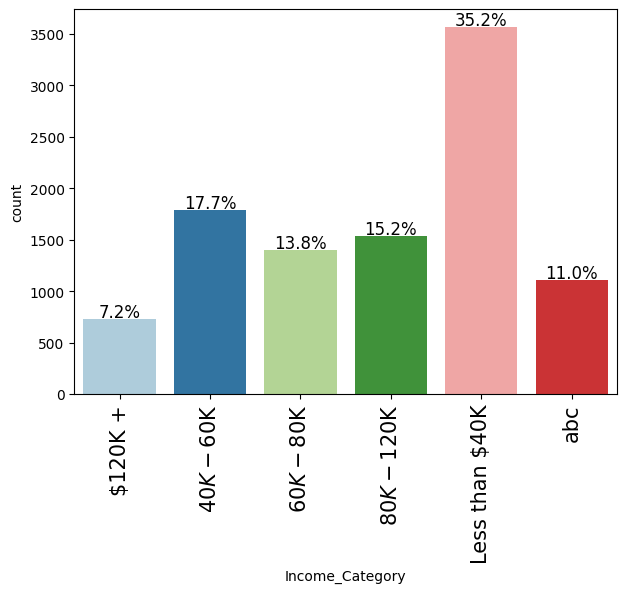

In [ ]:
labeled_barplot(df,"Income_Category",perc=True)

* Majority of the customers around 35% are in the income bracket of less than 40K USD, with next best around 18% in 40K - 60K range. and 15% of customers in 80K-120K range.
* There is also a missing data category termed as "abc", need to impute values for this category.

Card_Category

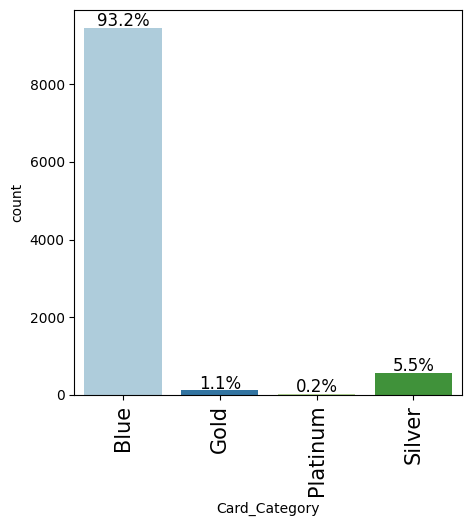

In [ ]:
labeled_barplot(df,"Card_Category",perc=True)

Around 93% of customers belong to Blue Category, with 5.5% of customers leading next in Silver Category, GOld at 1.1% and Platinum at 0.2%

Attrition_Flag

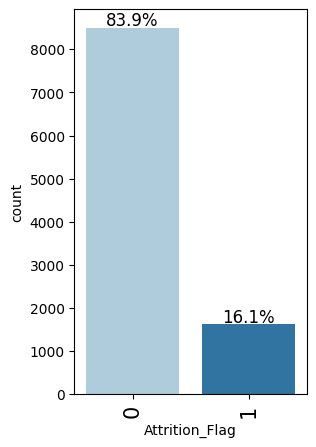

In [ ]:
labeled_barplot(df, "Attrition_Flag",perc=True)

Around 84% are existing customers while 16% are attrited customers. Its highly imbalanced dataset, so, would need to do under/over sampling to get accurate picture of distinction between 2 classes.

### Bivariate Analysis

Correlation

<Axes: >

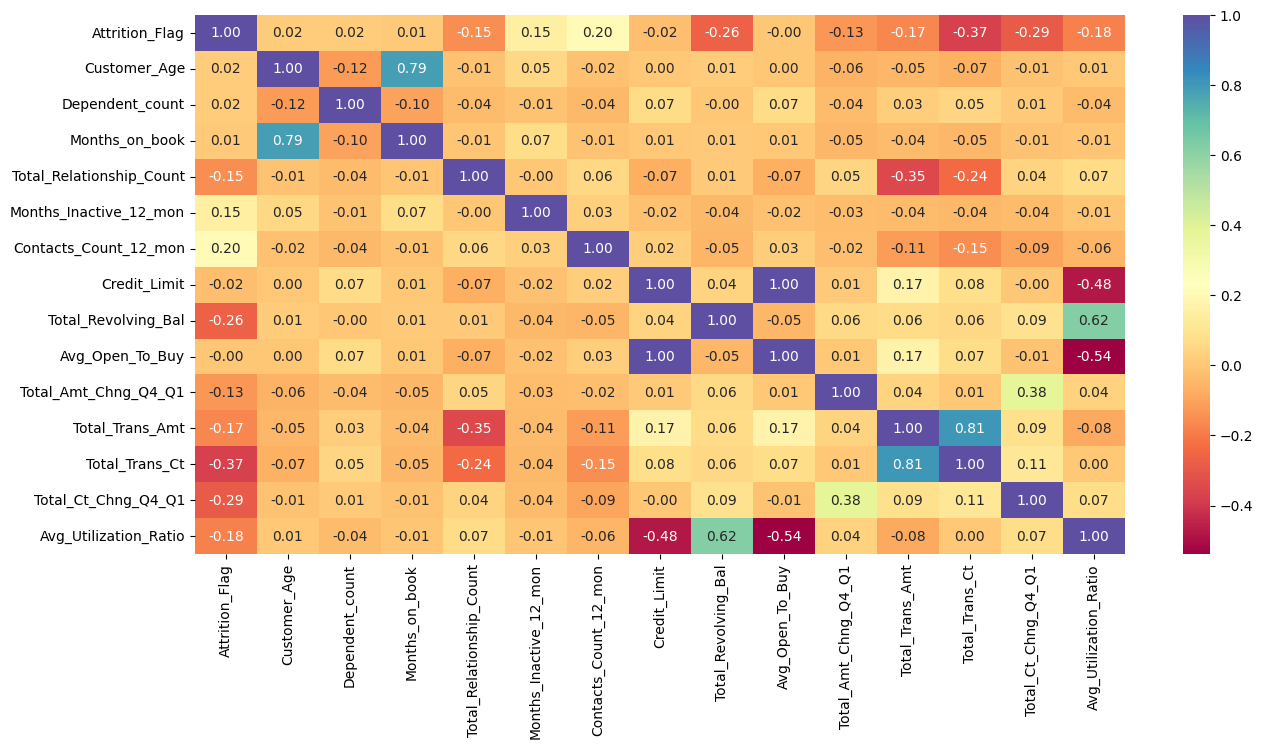

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(numeric_only=True),annot=True,fmt='.2f',cmap='Spectral')

* For Attrition Flag, top 3 influencing factors are Total_trans_ct[-0.37], TOtal_ct_chng_q4_q1[-0.29] and total_revolving_bal[-0.26]
* Since Avg_utilization_ratio, credit_limit[0.48] and avg_open_to_buy[0.54] are related to each other, there exists a high correlation between these attributes.
* Avg_open_to_buy and credit_limit are highly postively correlated[1], so, one of them need to be dropped.
* Avg_utilization_ratio is also highly postively correlated [0.62] with Total_revolving_bal.
* Total_Amt_chng_Q4_Q1 and total_ct_chng_Q4_Q1 are postively correlated [0.38] as one represents the count of other.
* Customer_Age and Months_on_book are highly postively correlated[0.79] and one of them could be potentially dropped to avoid multicollinearity.
* Total_relationship_count is negatively correlated with Total_trans_amt[-0.35] and total_trans_ct[-0.24]
* Total_Trans_amt and Total_trans_ct are highly postively correlated[0.81], so one of them could be dropped potentially.
* Column pairs considered in which one of them could be considered for dropping but depends on Variance Inflation Factor
  * Total_Trans_amt and Total_trans_ct [0.81]
  * Customer_Age and Months_on_book [0.79]
  * Avg_open_to_buy and credit_limit [1]


PairPlot

In [ ]:
plt.figure(figsize=(15,7))
sns.pairplot(df, hue='Attrition_Flag', diag_kind='kde')

Output hidden; open in https://colab.research.google.com to view.

Impact of attrition_Flag in these pair plots: Notable impacts:
* Customer_Age vs Total_Ct_Chng_Q4_Q1 : Regardless of Age/or anyother attribute[ This is common no matter what the feature against which it is compared.], Q4 Transaction count seems to be lesser when compared to Q1 for attrited customers.
* Customer_Age vs Total_Trans_Ct : Regardless of Age/or anyother attribute[ This is common no matter what the feature against which it is compared.], There's high cluster of transaction Count in lower range 0-80 for Atttrition customers indicating that transaction count is so less for attrition customers.
* Customer_Age vs Total_Trans_Amt: Regardless of Age/or anyother attribute[ This is common no matter what the feature against which it is compared.], There's high cluster of lower transaction amts for attrited customers while its mid-high for existing customers and higher range of transaction amount caters to both sets of customers.
* Customer_Age vs Total_revolving_Bal: For age 30-50,Total_revolving_bal is less for attrition customers with 500 USD or less. and it was higher than 500 existing customers.
* Customer_Age vs Contacts_Counts_12Mon: Regardless of Age/or anyother attribute[ This is common no matter what the feature against which it is compared.], invariably more the number of contacts with the bank,higher the attrition.
* Customer_Age vs Total_Relationship_Count: Attrited customer has lesser number of products when compared to existing customers regardless of their age/or anyother attribute[ This is common no matter what the feature against which it is compared.].
* Customer_Age vs Months_on_book: Months_on_book seems to be lower for younger age when compared to older _age adn there's a steady increase with age maxing out for40-45 for lower months_on_book while it steadily progresses as Age progresses.
* Dependent_count vs Total_Ct_Chng_Q4_Q1: regardless of Dependent_Count/or anyother attribute[ This is common no matter what the feature against which it is compared.],Q4 count seems to be lesser than Q1 for attrited customers.
* Dependent_Count vs Total_Trans-Ct: Regardless of dependent_count/or anyother attribute[ This is common no matter what the feature against which it is compared.], Transactions seem lesser for Attrited customers and range from 0-80.
*Dependent_count vs Total_revolving_Bal: Regardless of dependent_count/or anyother attribute[ This is common no matter what the feature against which it is compared.],Total_revolving_bal is less for attrition customers with 500 USD or less. and it was higher than 500 existing customers.
* Dependent_Count vs Contacts_Counts_12Mon: Regardless of Dependents_counts/or anyother attribute[ This is common no matter what the feature against which it is compared.], invariably more the number of contacts with the bank,higher the attrition.
* Dependent_count vs Months_inactive_12Mon: regardless of dependents_counts/or anyother attribute[ This is common no matter what the feature against which it is compared.], 3/4 months inactivity has been noticed by attrited customers.
* Months_on_book vs Total_Ct_Chng_Q4_Q1 : Regardless of months_on_book/or anyother attribute[ This is common no matter what the feature against which it is compared.], Q4 Transaction count seems to be lesser when compared to Q1 for attrited customers.
* Months_on_book vs Total_Trans_Ct : Regardless of months_on_book/or anyother attribute[ This is common no matter what the feature against which it is compared.], There's high cluster of transaction Count in lower range 0-80 for Atttrtion customers indicating that transaction count is so less for attrition customers.
* Months_on_book vs Total_Trans_Amt: Regardless of months_on_book/or anyother attribute[ This is common no matter what the feature against which it is compared.], There's high cluster of lower transaction amts for attrited customers while its mid-high for existing customers and higher range of transaction amount caters to both sets of customers.
* CreditLimit vs Avg_Util_Ratio: Utilization ratio is high when credit limit and reduces as credit raises.
* CreditLimit vs Avg_open_to_buy :  Perfect linear correlation, one of them needs to be dropped.

Attrition_Flag vs Gender

Attrition_Flag     0     1    All
Gender                           
All             8500  1627  10127
F               4428   930   5358
M               4072   697   4769
------------------------------------------------------------------------------------------------------------------------


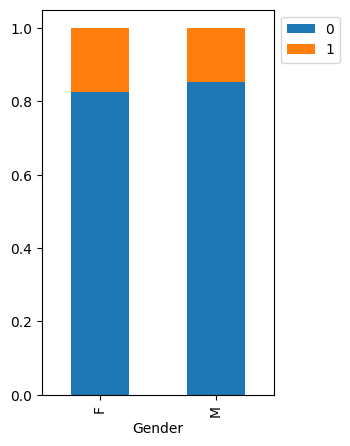

In [ ]:
stacked_barplot(df,"Gender","Attrition_Flag",)

Attrition distribution is shown above for Female vs Male and is almost approximately equal in attrition rate. Generally, Attrition rate is smaller in both segments.

Attrition_Flag vs Dependent_count

Attrition_Flag      0     1    All
Dependent_count                   
All              8500  1627  10127
3                2250   482   2732
2                2238   417   2655
1                1569   269   1838
4                1314   260   1574
0                 769   135    904
5                 360    64    424
------------------------------------------------------------------------------------------------------------------------


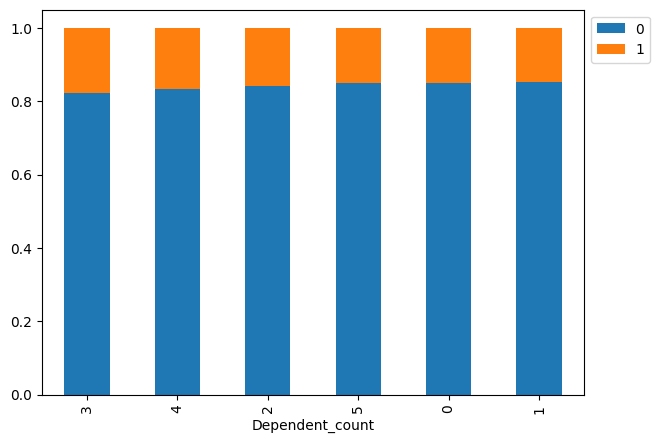

In [ ]:
stacked_barplot(df,"Dependent_count","Attrition_Flag")

Top 3 Dependent_Counts for which Attrition rate is higher:
- Customers with 3 dependents - 17.6%, followed by
- Customers with 4 dependents - 16.5%, followed by
- Customers with 2 dependents - 15.7%

Attrition_Flag vs Education_Level

Attrition_Flag      0     1   All
Education_Level                  
All              7237  1371  8608
Graduate         2641   487  3128
High School      1707   306  2013
Uneducated       1250   237  1487
College           859   154  1013
Doctorate         356    95   451
Post-Graduate     424    92   516
------------------------------------------------------------------------------------------------------------------------


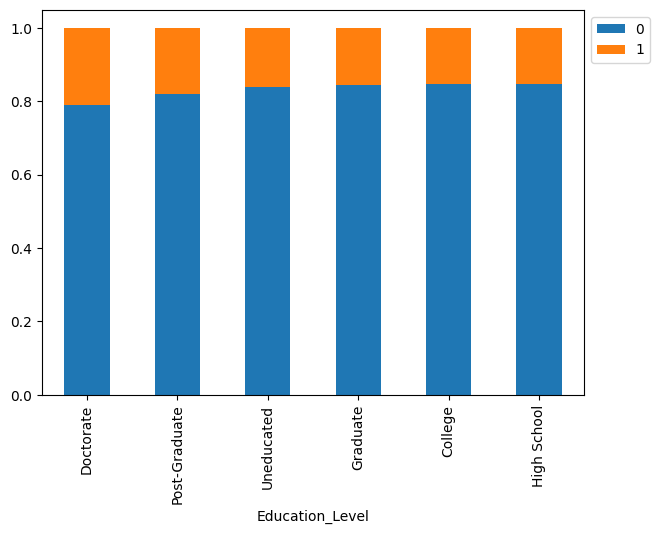

In [ ]:
stacked_barplot(df,"Education_Level","Attrition_Flag")

Top 3 Education Level with highest rate of Attrition
- Doctorate - 21%
- Post Graduate - 17.8%
- Uneducated - 15.9%

Attrition_Flag vs Marital_Status

Attrition_Flag     0     1   All
Marital_Status                  
All             7880  1498  9378
Married         3978   709  4687
Single          3275   668  3943
Divorced         627   121   748
------------------------------------------------------------------------------------------------------------------------


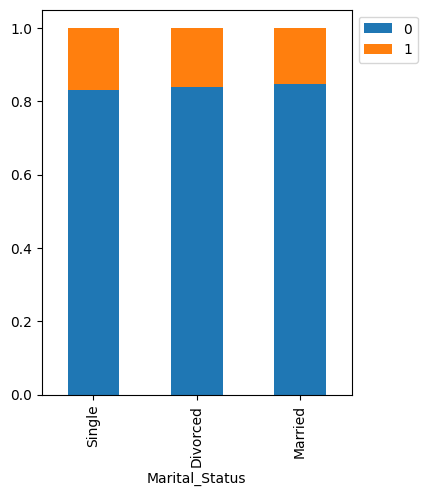

In [ ]:
stacked_barplot(df,"Marital_Status","Attrition_Flag")

Top 3 Attrition rate for different Marital status
- Single - 16.9%
- Divorced - 16.1%
- Married - 15.1%
Single Marital status has highest attrition rate.

Attrition_Flag vs Income_Category

Attrition_Flag      0     1    All
Income_Category                   
All              8500  1627  10127
Less than $40K   2949   612   3561
$40K - $60K      1519   271   1790
$80K - $120K     1293   242   1535
$60K - $80K      1213   189   1402
abc               925   187   1112
$120K +           601   126    727
------------------------------------------------------------------------------------------------------------------------


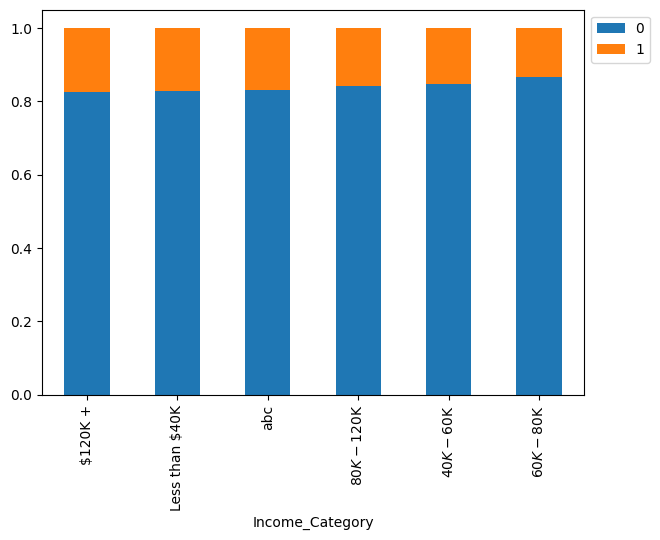

In [ ]:
stacked_barplot(df,"Income_Category","Attrition_Flag")

Top 3 Attrition Rate for Diff categories of Income
- 120K USD + - 17.3%
- Less than 40K USD - 17.1%
- abc - Unknown Category - 16.8%
* Attrition Rate seems to be highest in highest income and lowest income bracket.

Attrition_Flag vs Card_Category

Attrition_Flag     0     1    All
Card_Category                    
All             8500  1627  10127
Blue            7917  1519   9436
Silver           473    82    555
Gold              95    21    116
Platinum          15     5     20
------------------------------------------------------------------------------------------------------------------------


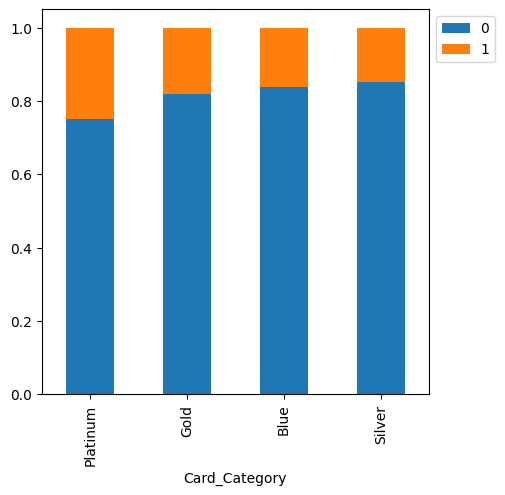

In [ ]:
stacked_barplot(df,"Card_Category","Attrition_Flag")

Top 3 Attrition Rates for different Card Category
- Platinum - 25%
- Gold - 18.1%
- Blue - 16.1%
Attrition rate is highest amongst the Platinum Card holders though total subscribers amount to just 20.

Attrition_Flag vs Total_Relationship_Count

Attrition_Flag               0     1    All
Total_Relationship_Count                   
All                       8500  1627  10127
3                         1905   400   2305
2                          897   346   1243
1                          677   233    910
5                         1664   227   1891
4                         1687   225   1912
6                         1670   196   1866
------------------------------------------------------------------------------------------------------------------------


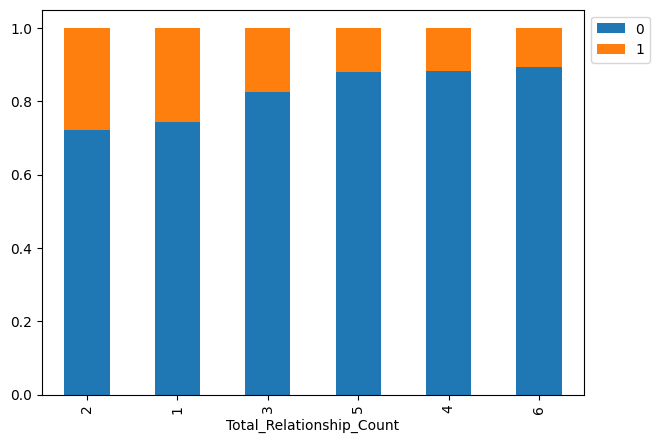

In [ ]:
stacked_barplot(df,"Total_Relationship_Count","Attrition_Flag")

Top 3 Attrition Rates for Total_Relationship_Count
- 2 with 27.8%
- 1 with 25.6%
- 3 with 17.3%
Lower number of products held by customer have higher attrition rate.

Attrition_Flag vs Months_Inactive_12_mon

Attrition_Flag             0     1    All
Months_Inactive_12_mon                   
All                     8500  1627  10127
3                       3020   826   3846
2                       2777   505   3282
4                        305   130    435
1                       2133   100   2233
5                        146    32    178
6                        105    19    124
0                         14    15     29
------------------------------------------------------------------------------------------------------------------------


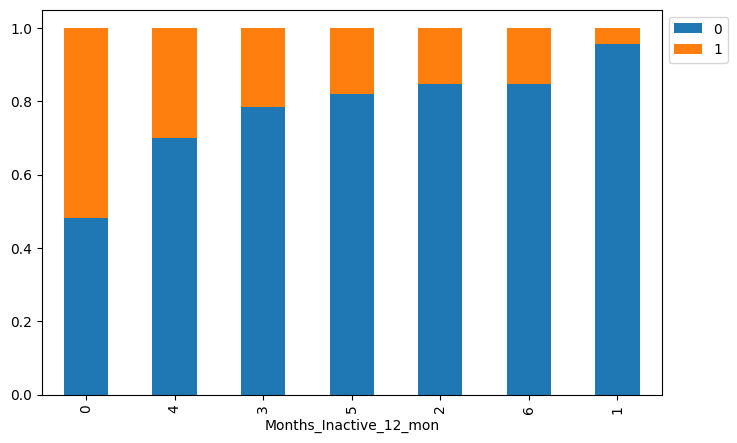

In [ ]:
stacked_barplot(df,"Months_Inactive_12_mon","Attrition_Flag")

TOp 3 Attrition Rate for Months_Inactive_12_mon
- 0 Months with 51.7%
- 4 Months with 29.9%
- 3 Months with 21.5%
Customers who were active all months seem to be the most with highest attrition rate.


Attrition_Flag vs Contacts_Count_12_mon

Attrition_Flag            0     1    All
Contacts_Count_12_mon                   
All                    8500  1627  10127
3                      2699   681   3380
2                      2824   403   3227
4                      1077   315   1392
1                      1391   108   1499
5                       117    59    176
6                         0    54     54
0                       392     7    399
------------------------------------------------------------------------------------------------------------------------


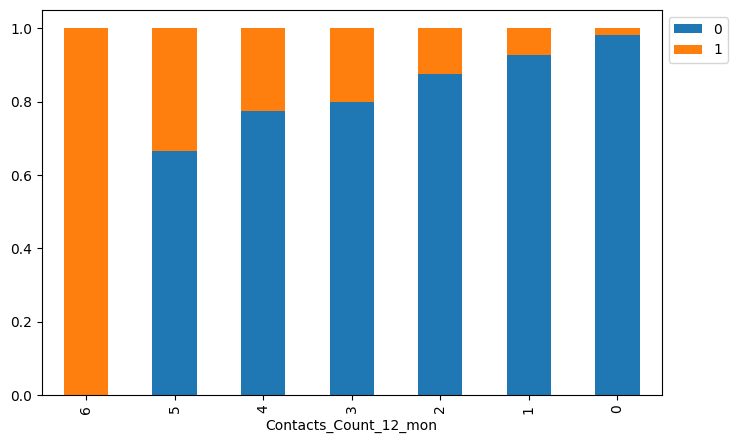

In [ ]:
stacked_barplot(df,"Contacts_Count_12_mon","Attrition_Flag")

Top 3 Attrition Rates for number of contacts b/w customer and bank
- 6 - 100%
- 5 - 33.5%
- 4 - 22.6%
All of those customers who made 6 calls to banks are attrited customers.

Attrition_Flag vs Customer_Age

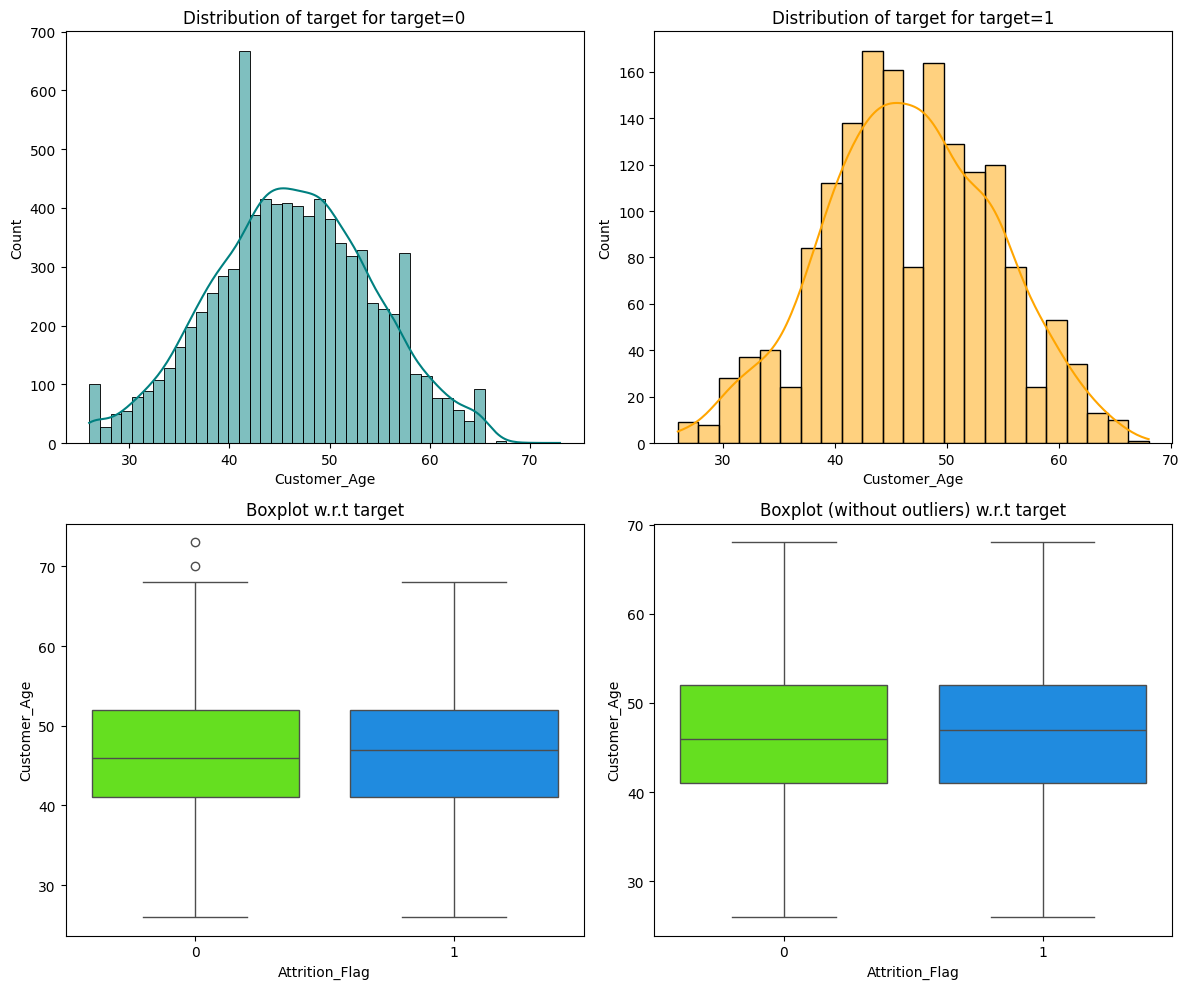

In [ ]:
distribution_plot_wrt_target(df,"Customer_Age","Attrition_Flag")

* Customer_Age is normally distributed for both Existing and Attrited customers.
* For Target - 0 -Existing customers, ~41-42 Years have the peak subscription for credit cards.
* For Target - 1 -Attrited customers, ~44-46 Years and ~48-50 Years have the peak subscription for credit cards.
* Outliers in Age are present for Existing customers and median for existing customers is slightly lesser than Attrited customers in terms of customer_Age.

Attrition_Flag vs Months_on_book

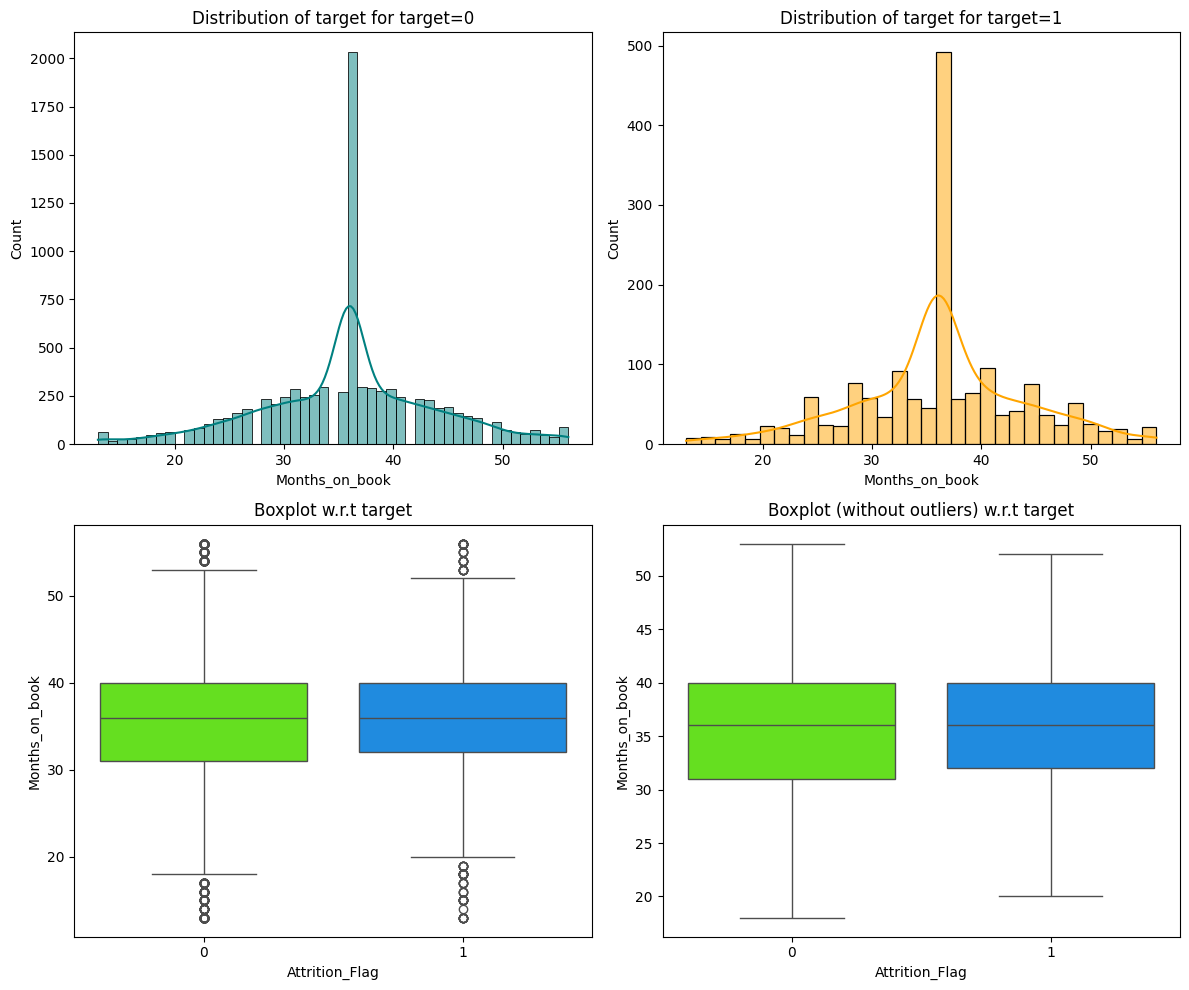

In [ ]:
distribution_plot_wrt_target(df,"Months_on_book","Attrition_Flag")

Median for both Existing and Attrited customers are the same. Both categories seem to have outliers in both ends.
So, its both tailed distributions for both categories.
There seems to be a peak around 36 months in both categories where existing customers peaked at 2000 and Attrited customers peaked at 500.

Attrition_Flag vs Credit_Limit

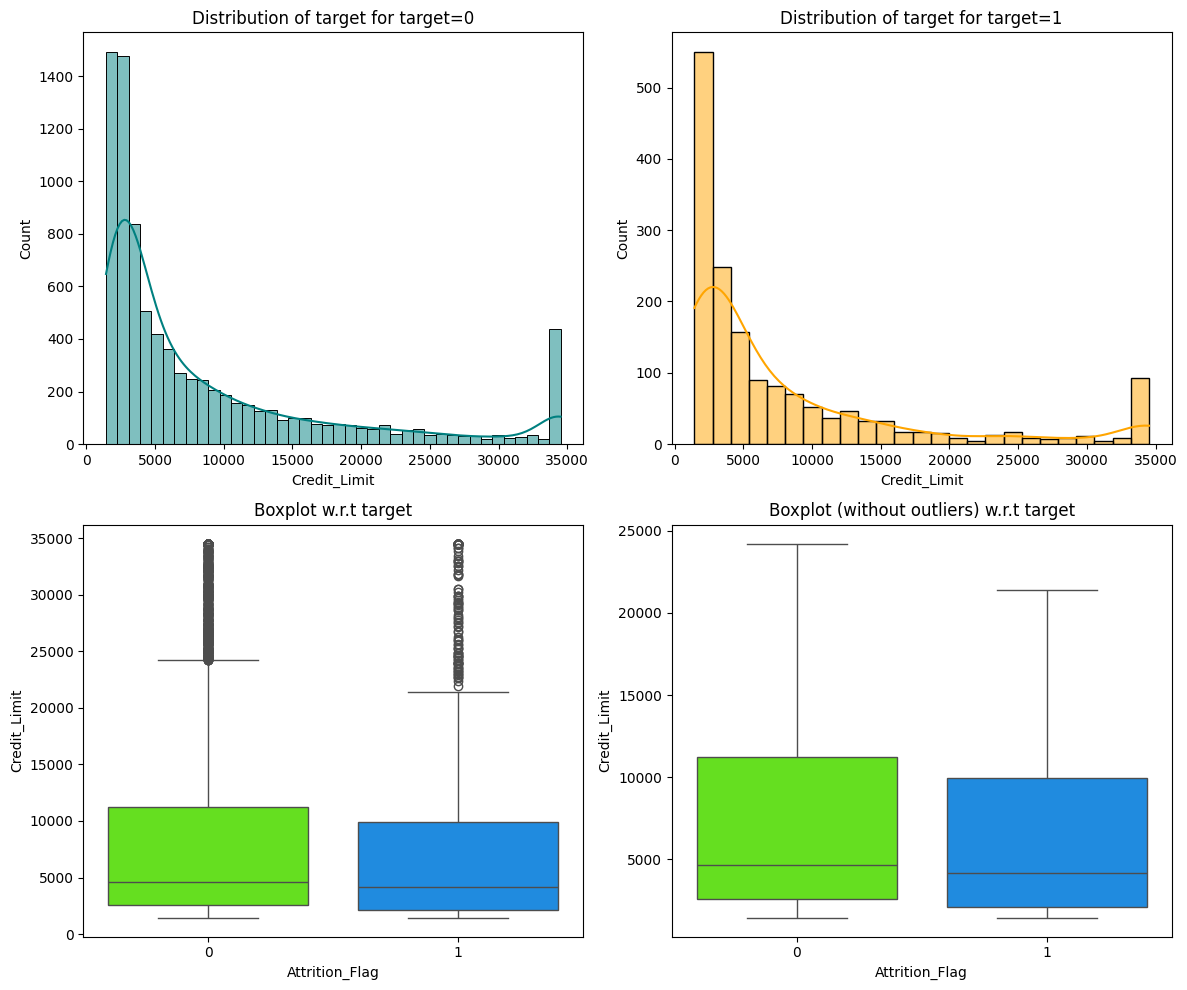

In [ ]:
distribution_plot_wrt_target(df,"Credit_Limit","Attrition_Flag")

- Credit limit's median is a bit higher for Existing customers than Attrited customers but the range of outliers started being very for CreditLimit being 22000 in case of attrited customers and around 24,000 in case of existing customers.
- Credit limit's peak is at less than 5000 for majority of Existing and majority of Attrited customers. SInce both categories have significant outliers, its a long right tailed distribution for both categories.

Attrition_Flag vs Total_Revolving_Bal

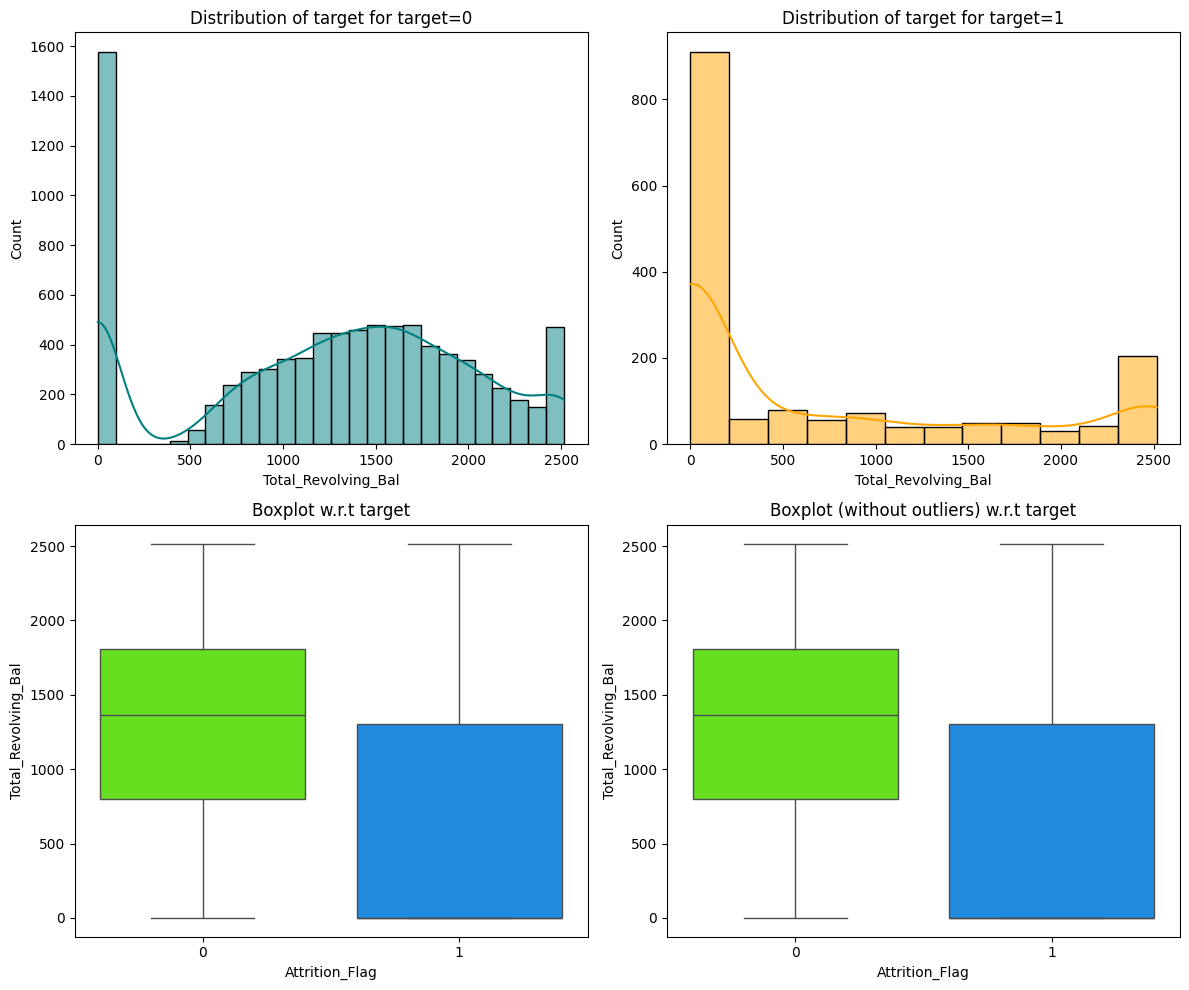

In [ ]:
distribution_plot_wrt_target(df,"Total_Revolving_Bal","Attrition_Flag")

* Revolving Balance for Attrited vs Existing customers have lot of variation with Median as 0 for Attrited Customers and around 1400 USD for Existing Customers.
* THough peak for both categories are at 0 USD, Revolving balance takes a smooth normal curve distribution pattern in case of existing customers.
* No outliers for this attribute.
* Shows Attrited customers never had revolving balance.

Attrition_Flag vs Avg_Open_To_Buy

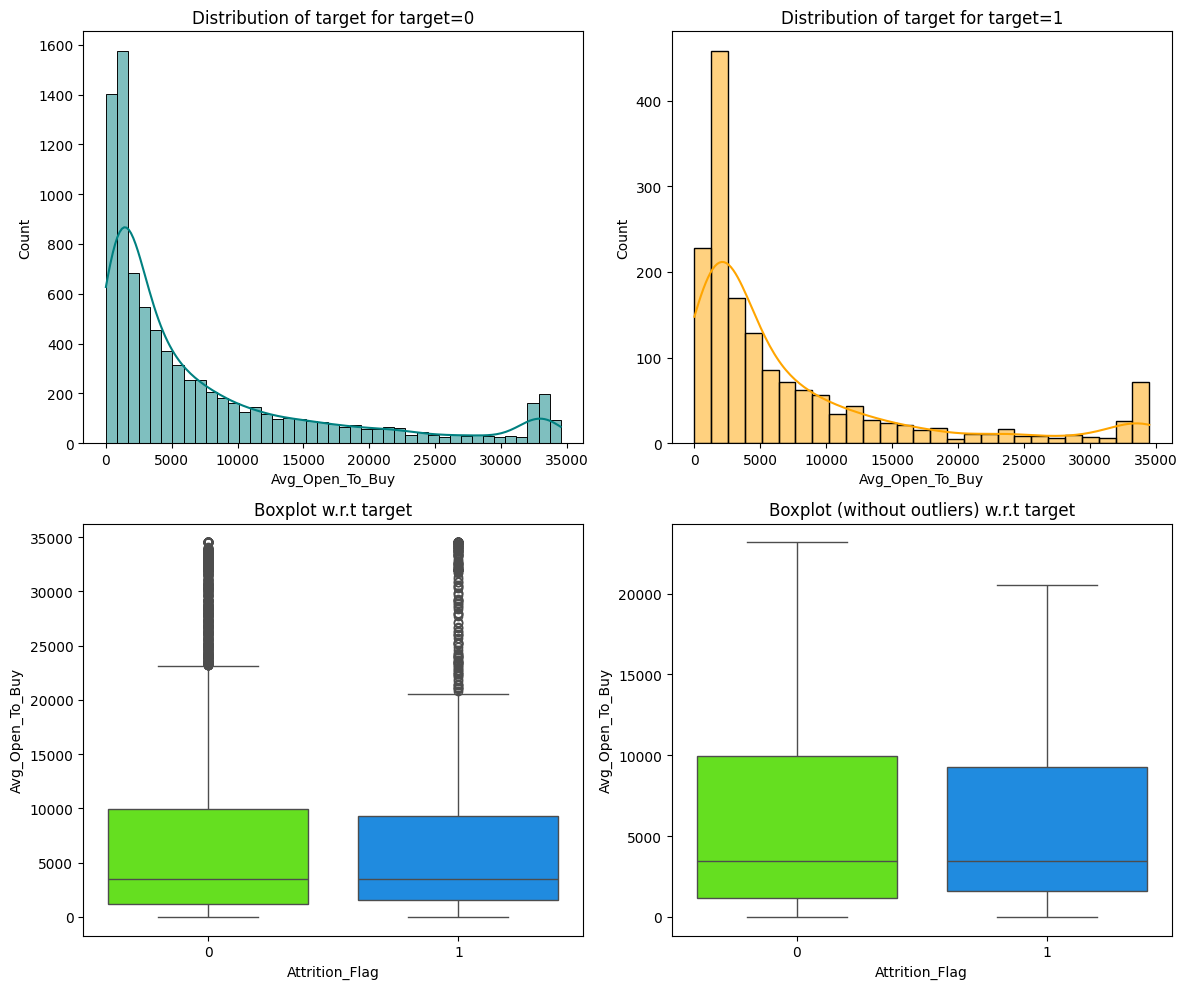

In [ ]:
distribution_plot_wrt_target(df,"Avg_Open_To_Buy","Attrition_Flag")

* Highly right skewed distribution for both categories - Existing and Attrited customers.
* Both categories have peak value at 0-2500K USD, indicating the amount left for majority of users to use. And hence, median hovers around the same value for both categories.
* Significant outliers for both categories on the right side indicating right tail.
* Outliers are significant above 21,000 USD for Attrited customers while its slightly higher for Existing customers around 24,000 USD.
**Both categories have peak value at 0-2500K USD, indicating the amount left for majority of users to use

Attrition_Flag vs Total_Amt_Chng_Q4_Q1

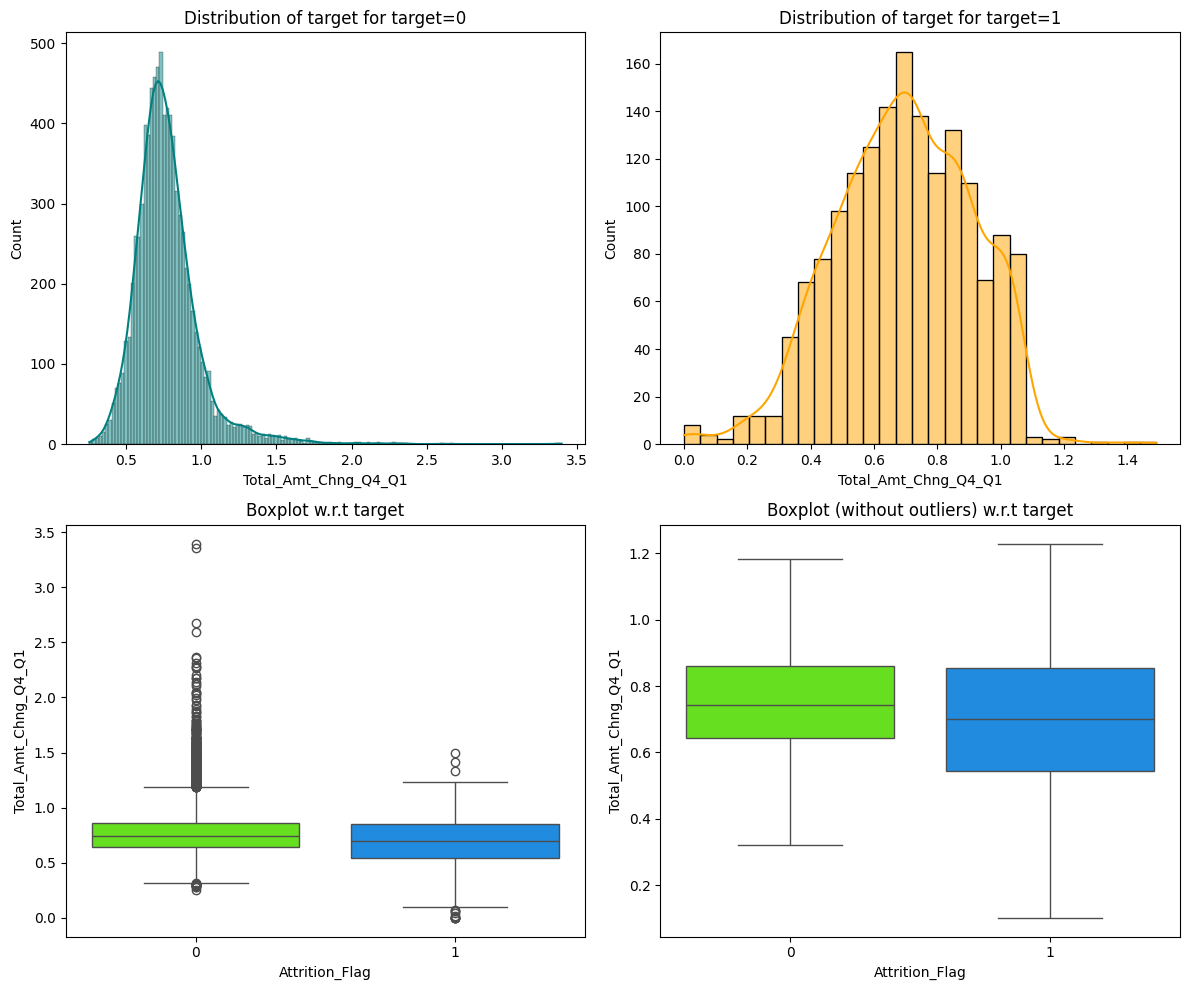

In [ ]:
distribution_plot_wrt_target(df,"Total_Amt_Chng_Q4_Q1","Attrition_Flag")

* For Total_Amt_Chng_Q4_Q1, Both categories have outliers at either ends indicating data extremities. Outliers are significant for Existing customers whwn Total_Amt_Chng_Q4_Q1 is higher than 1.19ish, its slightly present above 1.2 in case of attrited customers.
* Median hovers around 0.7-0.75 for Attrited-Existing customers respectively.
* Around 70% -75% of the amount transacted in Q1 was transacted in Q4 for both categories for close to 50% of customers.
* Dsitribution seems to be normal for both existing and attrited customers.

Attrition_Flag vs Total_Trans_Amt

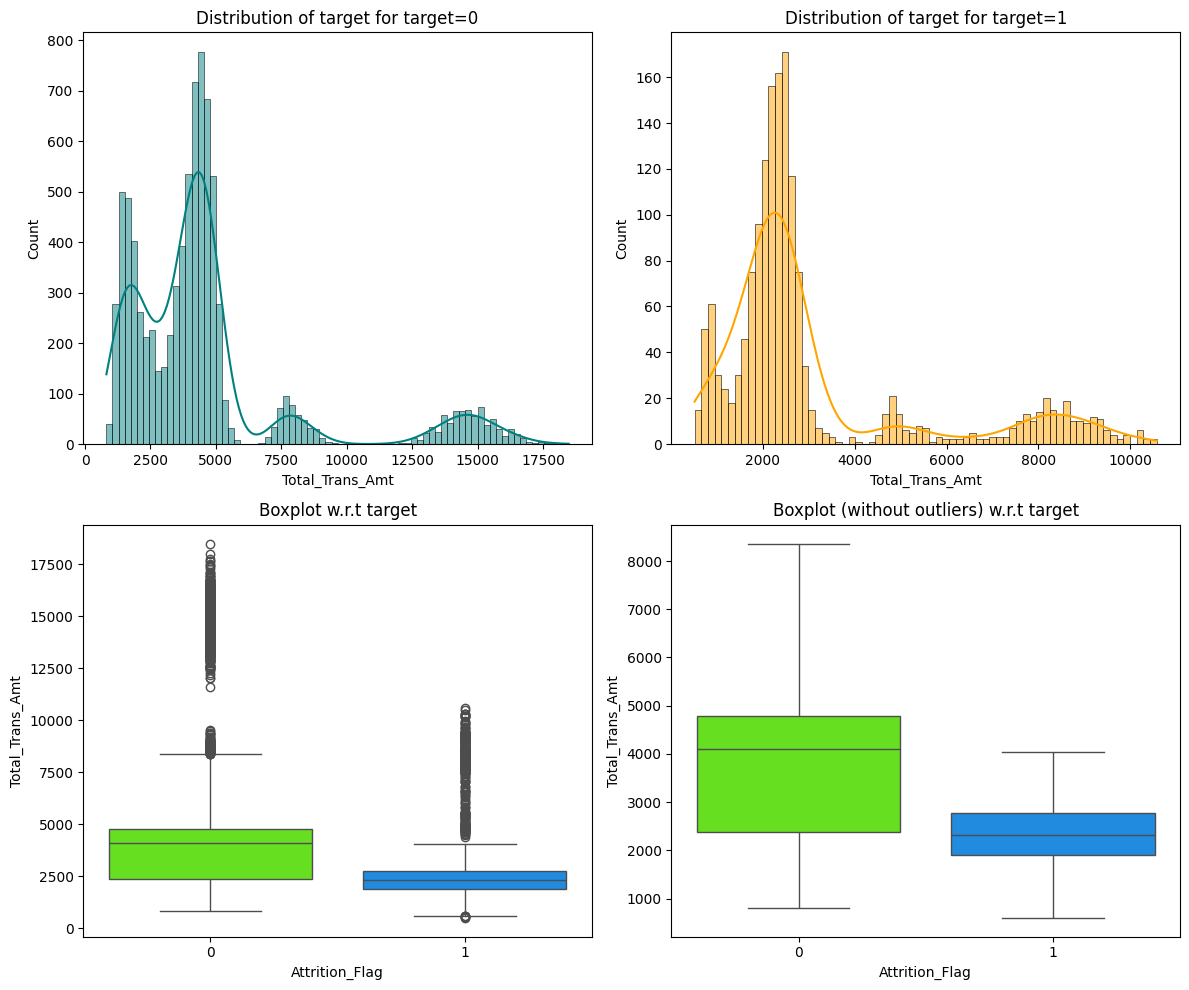

In [ ]:
distribution_plot_wrt_target(df,"Total_Trans_Amt","Attrition_Flag")

* For Existing customers, heavy data around middle 50% of customers, total transaction amount lies between 2500-5000 USD and there are significant outliers above 8500ish.
  * Peak data is around 1000-1500 USD, and 4000-5000 USD
* For Attrited customers,heavy data around middle 50% of customers, total transaction amount lies between 1800-2800 and there are significant outliers above 4000 USD.
  * Peak data is around 2000-3000 USD.
* Median is higher for existing customers at around 4000 USD while its around 2500 USD for Attrited customers.
* As a general note, Total Transaction amount is higher for Existing customers while its lesser for Attrited customers.

Attrition_Flag vs Total_Trans_Ct

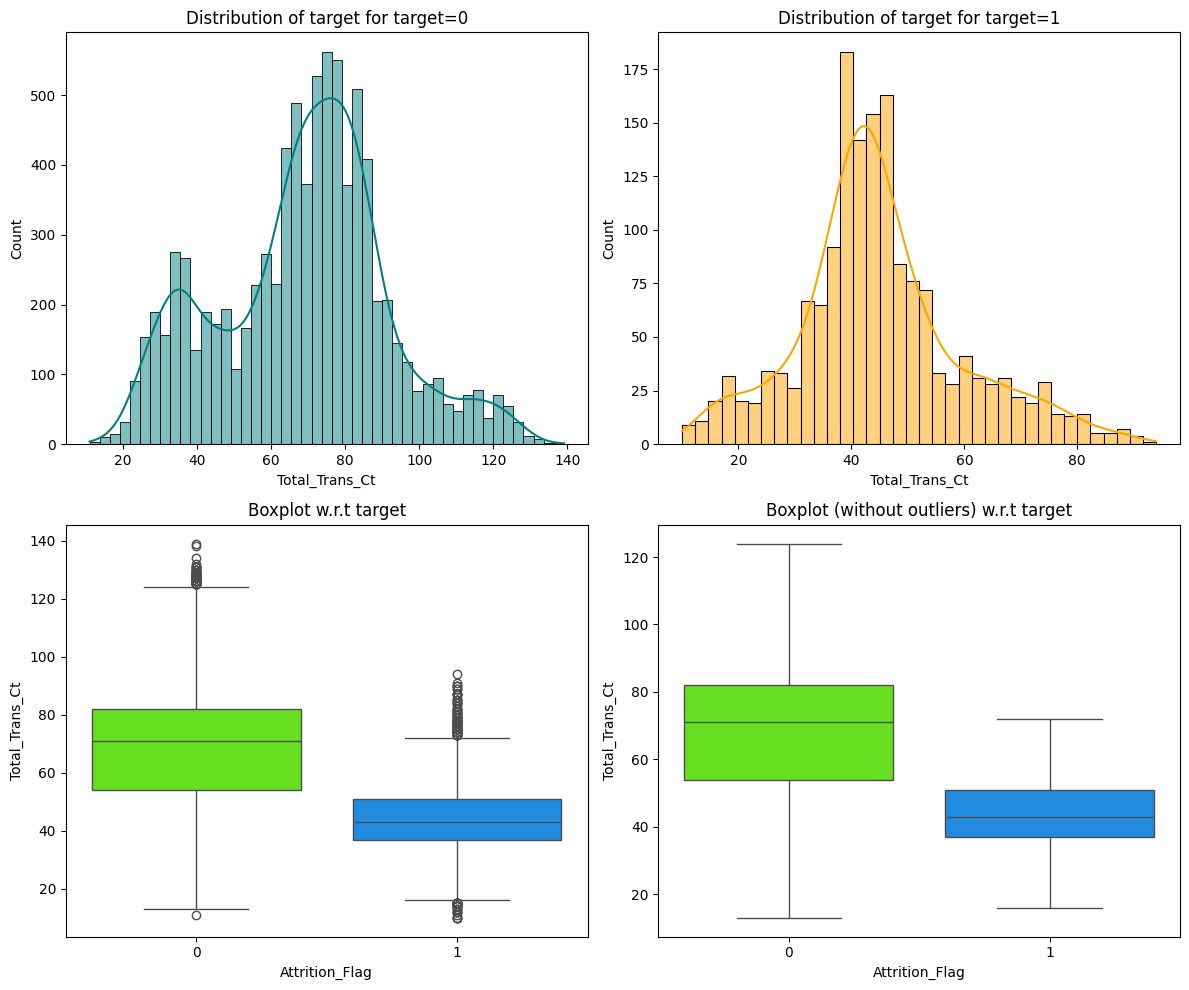

In [ ]:
distribution_plot_wrt_target(df,"Total_Trans_Ct","Attrition_Flag")

* Transaction count for existing customers - has median of around 70 and majority 50% of data lies between 55-83ish. there are significant number of outliers above 125. Data peak is around 62-84 substantiating the evidence of bulk of data around that range.
* Transaction count for attrited customers - has median around 40-45 and majority 50% of the data lies between 35-50ish. There are significant number of outliers below 10 and above 70. Data peak is around 38-46 substantiating the evidence of bulk of data around that range.
* Attrited customers transact less than the existing customers indicating signs of attrition and not using the card.

Attrition_Flag vs Total_Ct_Chng_Q4_Q1

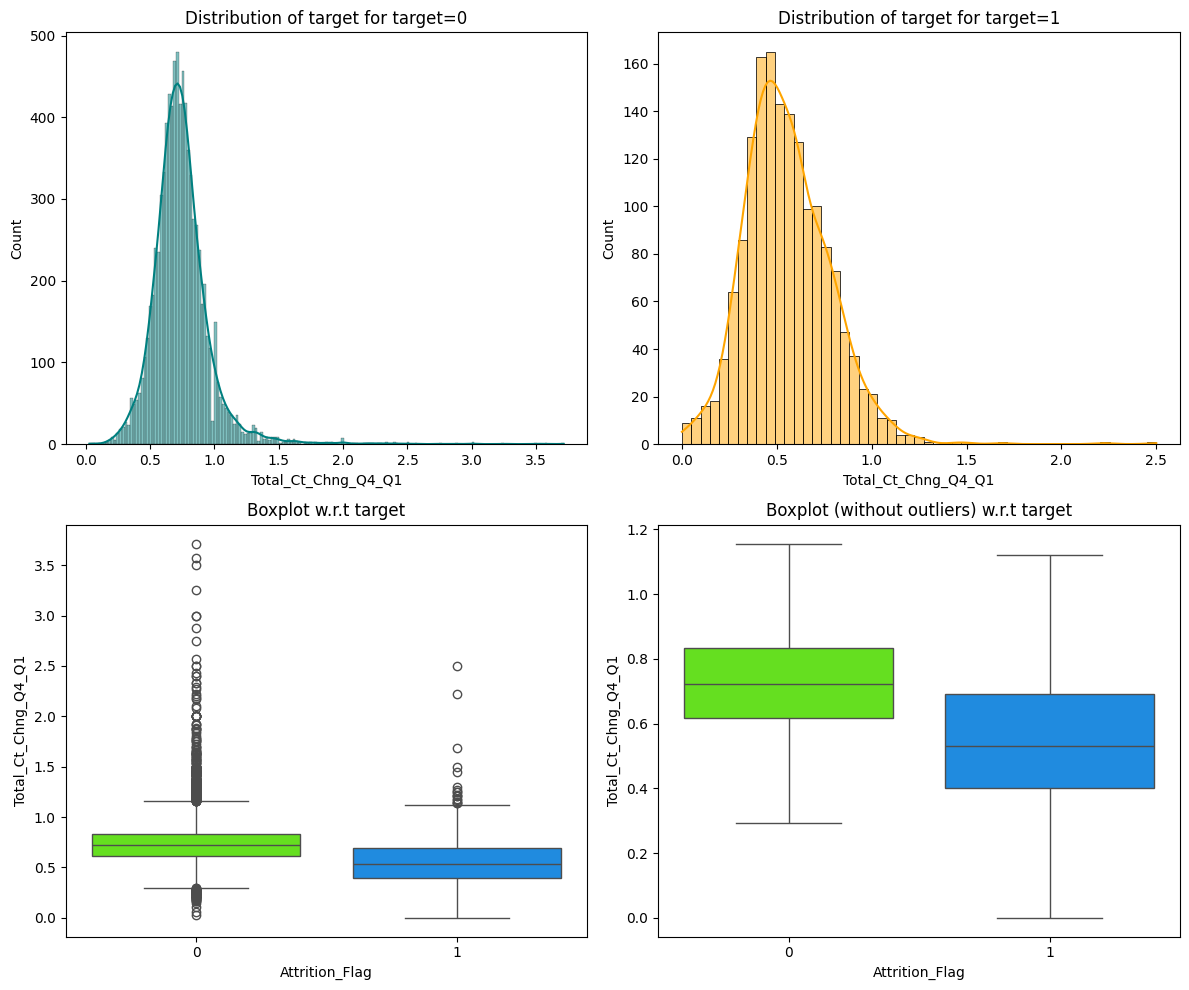

In [ ]:
distribution_plot_wrt_target(df,"Total_Ct_Chng_Q4_Q1","Attrition_Flag")

* Transaction Count ratio for Q4 to Q1 for existing customers has median around 0.75 with bulk 50% of data between 0.6-0.8 and there are significant number of outliers above 1.2 indicating Q4 transaction count is higher than Q1 count.

* Transaction count ratio for Q4 to Q1 for attrited customers has median around 0.5 and majority bulk 50% of data lies between ~0.4 - ~0.7 and there significant number of outliers above 1.1 indicating Q4 transaction is higher than Q1 count.

*  Generally, For existing & Attrited customers, Q1 transaction count seems higher than Q4 for atleast 50% of customers.

Attrition_Flag vs Avg_Utilization_Ratio

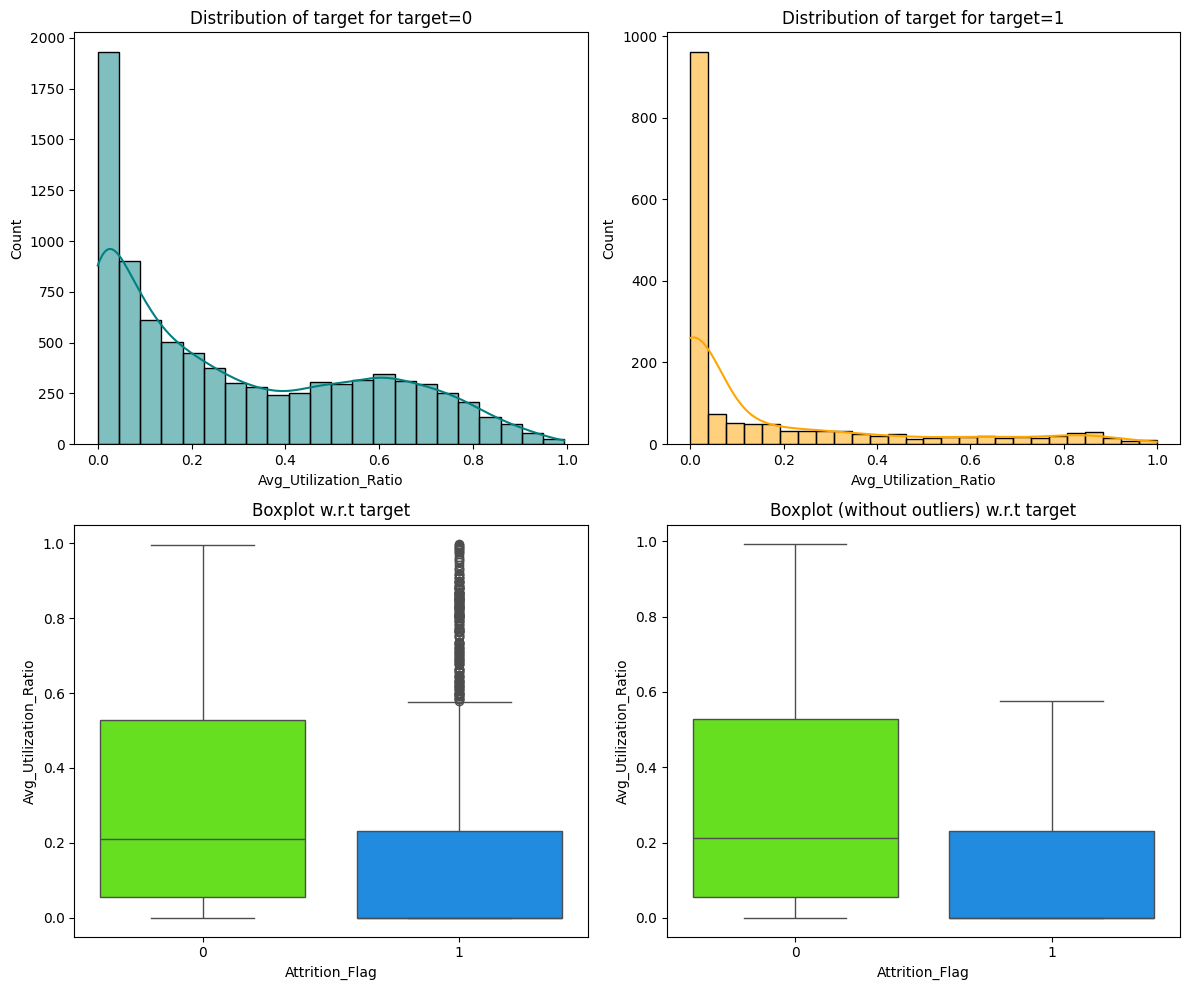

In [ ]:
distribution_plot_wrt_target(df,"Avg_Utilization_Ratio","Attrition_Flag")

* Avg_utilization_ratio for existing customers indicating how much of the avl credit they have spent ranges from 0-1 but bulk majority of data lies between 0.05-0.55 adn there are no outliers. Data peaks at 0 indicating they haven't spent from their credit.
* Avg_utilization_ratio for Attrited customers indicating how much of the avl credit they have spent ranges from 0-0.57 while bulk majority of data lies between 0-0.2, indicating lesser usage of Credit card credit, also indicating signs of attrition and poor usage. Data peaks at 0, and median is also 0 further substantiating the evidence of poor usage and hence, the attrition.

## Data Pre-processing

### Find out which columns in this lot could be dropped by finding out multicollinearity
* Column pairs considered in which one of them could be dropped
  * Total_Trans_amt and Total_trans_ct [0.81]
  * Customer_Age and Months_on_book [0.79]
  * Avg_open_to_buy and credit_limit [1]

Before Multicollinearity detection

In [ ]:
# Adding a constant to the model
X = df.select_dtypes(include='number').assign(intercept=1)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                     feature     VIF
0             Attrition_Flag   1.572
1               Customer_Age   2.676
2            Dependent_count   1.031
3             Months_on_book   2.658
4   Total_Relationship_Count   1.208
5     Months_Inactive_12_mon   1.033
6      Contacts_Count_12_mon   1.062
7               Credit_Limit     inf
8        Total_Revolving_Bal     inf
9            Avg_Open_To_Buy     inf
10      Total_Amt_Chng_Q4_Q1   1.194
11           Total_Trans_Amt   3.426
12            Total_Trans_Ct   3.624
13       Total_Ct_Chng_Q4_Q1   1.266
14     Avg_Utilization_Ratio   2.900
15                 intercept 106.308


We can see that Credit_limit, Avg_Open_To_Buy, Total_Revolving_Bal have Variance Inflation Factor as infinity, so, need to drop one of them and reassess the VIF.

After multicollinearity detection

In [ ]:
X = df.drop('Avg_Open_To_Buy',axis=1).select_dtypes(include='number').assign(intercept=1)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                     feature     VIF
0             Attrition_Flag   1.572
1               Customer_Age   2.676
2            Dependent_count   1.031
3             Months_on_book   2.658
4   Total_Relationship_Count   1.208
5     Months_Inactive_12_mon   1.033
6      Contacts_Count_12_mon   1.062
7               Credit_Limit   1.767
8        Total_Revolving_Bal   2.301
9       Total_Amt_Chng_Q4_Q1   1.194
10           Total_Trans_Amt   3.426
11            Total_Trans_Ct   3.624
12       Total_Ct_Chng_Q4_Q1   1.266
13     Avg_Utilization_Ratio   2.900
14                 intercept 106.308


Dropping 'Avg_Open_To_Buy' as detected by VIF in original dataset.

In [ ]:
df.drop('Avg_Open_To_Buy',axis=1,inplace=True)

### Outlier Detection

Outlier treatment is generally recommended to be performed **before** splitting the dataset into training, validation, and test subsets. Here’s why this approach is advisable:

1. **Consistent Data Processing**: By handling outliers before splitting, you ensure consistent treatment across all parts of your dataset. This **prevents information leakage from the test set into training**, which could occur if outliers are handled separately in each subset.

2. **Improved Model Performance**: Outliers can significantly affect model training, especially in models sensitive to anomalous data points. Treating them beforehand allows the model to learn from a data distribution that better represents the central tendencies, leading to improved accuracy and generalization.

3. **Uniform Data Distribution**: Ensuring that the data distribution remains uniform and consistent across training, validation, and test sets helps in detecting models that are more robust and generalizable.


In [ ]:
#Function to detect outliers
def detectOutliers(data, feature):
  """
  Function to detect outliers
  data: dataframe
  feature: column
  returns Dataframe with values for columns found to have outliers from EDA
  """
  q1 = data[feature].quantile(0.25)
  q3 = data[feature].quantile(0.75)
  iqr = q3-q1
  upper = q3 + 1.5 * iqr
  lower = q1 - 1.5 * iqr
  df_data = data[((data[feature] < lower)   | (data[feature] > upper))][feature].agg({'Minimum': 'min','Maximum': 'max','OutlierCnt':'count'})
  newRows = pd.DataFrame([[lower],[upper]],index=["Lower","Upper"],columns=[feature])
  return pd.concat([newRows,df_data])

In [ ]:
#columns found to have outliers from EDA, detects outliers for each of these columns and present outlierStats
outlier_num_cols = ['Months_on_book','Credit_Limit','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']
outlierdf = []
for col in outlier_num_cols:
  df_outliers = detectOutliers(df,col)
  outlierdf.append(df_outliers)
outlierStats = pd.concat(outlierdf,axis=1)
outlierStats

,Months_on_book,Credit_Limit,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Lower,17.500,-10213.750,0.289,-1722.750,-9.000,0.228,-0.697
Upper,53.500,23836.250,1.201,8619.250,135.000,1.172,1.223
Minimum,13.000,23848.000,0.000,8620.000,138.000,0.000,NaN
Maximum,56.000,34516.000,3.397,18484.000,139.000,3.714,NaN
OutlierCnt,386.000,984.000,396.000,896.000,2.000,394.000,0.000


In [ ]:
# Function to treat outliers by clipping the data with min/max
def treatOutliers(data, feature,lower,upper):
  """
  Function to treat outliers to clip the extremes with lower and upper values found earlier.
  data: Dataset
  feature: column with outlier
  lower: Minimum: Q1-1.5*IQR
  upper: Maximum: Q3+1.5*IQR
  """
  data[feature] = np.clip(data[feature],lower, upper)

# Treat outliers for ['Months_on_book','Credit_Limit','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1']
outlier_num_cols = ['Months_on_book','Credit_Limit','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1']
for outlierStatsIndex,col in enumerate(outlier_num_cols):
  print("Lower for",col,"is",outlierStats.T['Lower'][outlierStatsIndex])
  print("Upper for",col,"is",outlierStats.T['Upper'][outlierStatsIndex])
  treatOutliers(df,col,outlierStats.T['Lower'][outlierStatsIndex],outlierStats.T['Upper'][outlierStatsIndex])

Lower for Months_on_book is 17.5
Upper for Months_on_book is 53.5
Lower for Credit_Limit is -10213.75
Upper for Credit_Limit is 23836.25
Lower for Total_Amt_Chng_Q4_Q1 is 0.28900000000000003
Upper for Total_Amt_Chng_Q4_Q1 is 1.201
Lower for Total_Trans_Amt is -1722.75
Upper for Total_Trans_Amt is 8619.25
Lower for Total_Trans_Ct is -9.0
Upper for Total_Trans_Ct is 135.0
Lower for Total_Ct_Chng_Q4_Q1 is 0.22799999999999998
Upper for Total_Ct_Chng_Q4_Q1 is 1.172


In [ ]:
#Validate if there are any outliers to these columns after outlier treatment in previous step
outlier_num_cols = ['Months_on_book','Credit_Limit','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1']
treatedOutlierdf = []
for col in outlier_num_cols:
  df_data = detectOutliers(df,col)
  treatedOutlierdf.append(df_data)
treatedOutlierStats = pd.concat(treatedOutlierdf,axis=1)
treatedOutlierStats #it appears outlier Counts are 0 for these  columns so, outlier treatment worked.

,Months_on_book,Credit_Limit,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
Lower,17.500,-10213.750,0.289,-1722.750,-9.000,0.228
Upper,53.500,23836.250,1.201,8619.250,135.000,1.172
Minimum,NaN,NaN,NaN,NaN,NaN,NaN
Maximum,NaN,NaN,NaN,NaN,NaN,NaN
OutlierCnt,0.000,0.000,0.000,0.000,0.000,0.000


### Replacing Income_Category ABC with NaN before splitting

In [ ]:
df.Income_Category.replace("abc",np.nan,inplace=True) #replacing abc as NaN

In [ ]:
df.Income_Category.value_counts(dropna=False) #Checking values counts for each category

,count
Income_Category,
Less than $40K,3561
$40K - $60K,1790
$80K - $120K,1535
$60K - $80K,1402
NaN,1112
$120K +,727


### Training Validation Test Split

In [ ]:
X = df.drop("Attrition_Flag",axis=1)
y= df['Attrition_Flag']
X_train,X_temp,y_train,y_temp = train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)
X_test,X_val,y_test,y_val = train_test_split(X_temp,y_temp,test_size=0.3,random_state=1,stratify=y_temp)

In [ ]:
print("Y_train",y_train.value_counts(normalize=True))
print("Y_test",y_test.value_counts(normalize=True))
print("Y_val",y_val.value_counts(normalize=True))

Y_train Attrition_Flag
0   0.839
1   0.161
Name: proportion, dtype: float64
Y_test Attrition_Flag
0   0.839
1   0.161
Name: proportion, dtype: float64
Y_val Attrition_Flag
0   0.840
1   0.160
Name: proportion, dtype: float64


### Missing value imputation




In [ ]:
df.isnull().sum()[df.isnull().sum() > 0] #Income_category had abc, now replaced with NaN

,0
Education_Level,1519
Marital_Status,749
Income_Category,1112


In [ ]:
imputer = SimpleImputer(strategy='most_frequent')
reqd_col_for_impute = ["Education_Level", "Marital_Status", "Income_Category"]

In [ ]:
X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute])
X_val[reqd_col_for_impute] = imputer.transform(X_val[reqd_col_for_impute]) # Only apply the values from Training to Validation to avoid data leakage
X_test[reqd_col_for_impute] = imputer.transform(X_test[reqd_col_for_impute]) # Only apply the values from Training to Test to avoid data leakage

In [ ]:
X_train.isnull().sum()[X_test.isnull().sum() > 0] #Random Check

,0


### Categorical Variables Encoding for Training, test and validaton

In [ ]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

Gender
F    3770
M    3318
Name: count, dtype: int64
******************************
Education_Level
Graduate         3247
High School      1425
Uneducated       1031
College           709
Post-Graduate     364
Doctorate         312
Name: count, dtype: int64
******************************
Marital_Status
Married     3815
Single      2771
Divorced     502
Name: count, dtype: int64
******************************
Income_Category
Less than $40K    3273
$40K - $60K       1254
$80K - $120K      1084
$60K - $80K        974
$120K +            503
Name: count, dtype: int64
******************************
Card_Category
Blue        6621
Silver       375
Gold          78
Platinum      14
Name: count, dtype: int64
******************************


In [ ]:
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

Gender
F    468
M    444
Name: count, dtype: int64
******************************
Education_Level
Graduate         432
High School      189
Uneducated       122
College           86
Post-Graduate     45
Doctorate         38
Name: count, dtype: int64
******************************
Marital_Status
Married     485
Single      356
Divorced     71
Name: count, dtype: int64
******************************
Income_Category
Less than $40K    416
$40K - $60K       155
$60K - $80K       144
$80K - $120K      139
$120K +            58
Name: count, dtype: int64
******************************
Card_Category
Blue        838
Silver       62
Gold          8
Platinum      4
Name: count, dtype: int64
******************************


In [ ]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_test[i].value_counts())
    print("*" * 30)

Gender
F    1120
M    1007
Name: count, dtype: int64
******************************
Education_Level
Graduate         968
High School      399
Uneducated       334
College          218
Post-Graduate    107
Doctorate        101
Name: count, dtype: int64
******************************
Marital_Status
Married     1136
Single       816
Divorced     175
Name: count, dtype: int64
******************************
Income_Category
Less than $40K    984
$40K - $60K       381
$80K - $120K      312
$60K - $80K       284
$120K +           166
Name: count, dtype: int64
******************************
Card_Category
Blue        1977
Silver       118
Gold          30
Platinum       2
Name: count, dtype: int64
******************************


In [ ]:
#Get Dummies for all categorical columns in Training, test and validation
X_train = pd.get_dummies(X_train, drop_first=True)
X_train = X_train.astype('float')

X_val = pd.get_dummies(X_val,drop_first=True)
X_val = X_val.astype('float')

X_test = pd.get_dummies(X_test,drop_first=True)
X_test = X_test.astype('float')

In [ ]:
# Info after creating dummies for categorical columns
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7088 entries, 4124 to 4752
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer_Age                    7088 non-null   float64
 1   Dependent_count                 7088 non-null   float64
 2   Months_on_book                  7088 non-null   float64
 3   Total_Relationship_Count        7088 non-null   float64
 4   Months_Inactive_12_mon          7088 non-null   float64
 5   Contacts_Count_12_mon           7088 non-null   float64
 6   Credit_Limit                    7088 non-null   float64
 7   Total_Revolving_Bal             7088 non-null   float64
 8   Total_Amt_Chng_Q4_Q1            7088 non-null   float64
 9   Total_Trans_Amt                 7088 non-null   float64
 10  Total_Trans_Ct                  7088 non-null   float64
 11  Total_Ct_Chng_Q4_Q1             7088 non-null   float64
 12  Avg_Utilization_Ratio           7088

In [ ]:
# Info after creating dummies for categorical columns
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 3023 to 3252
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer_Age                    912 non-null    float64
 1   Dependent_count                 912 non-null    float64
 2   Months_on_book                  912 non-null    float64
 3   Total_Relationship_Count        912 non-null    float64
 4   Months_Inactive_12_mon          912 non-null    float64
 5   Contacts_Count_12_mon           912 non-null    float64
 6   Credit_Limit                    912 non-null    float64
 7   Total_Revolving_Bal             912 non-null    float64
 8   Total_Amt_Chng_Q4_Q1            912 non-null    float64
 9   Total_Trans_Amt                 912 non-null    float64
 10  Total_Trans_Ct                  912 non-null    float64
 11  Total_Ct_Chng_Q4_Q1             912 non-null    float64
 12  Avg_Utilization_Ratio           912 n

In [ ]:
# Info after creating dummies for categorical columns
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2127 entries, 5599 to 8789
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer_Age                    2127 non-null   float64
 1   Dependent_count                 2127 non-null   float64
 2   Months_on_book                  2127 non-null   float64
 3   Total_Relationship_Count        2127 non-null   float64
 4   Months_Inactive_12_mon          2127 non-null   float64
 5   Contacts_Count_12_mon           2127 non-null   float64
 6   Credit_Limit                    2127 non-null   float64
 7   Total_Revolving_Bal             2127 non-null   float64
 8   Total_Amt_Chng_Q4_Q1            2127 non-null   float64
 9   Total_Trans_Amt                 2127 non-null   float64
 10  Total_Trans_Ct                  2127 non-null   float64
 11  Total_Ct_Chng_Q4_Q1             2127 non-null   float64
 12  Avg_Utilization_Ratio           2127

All three datsets training, test and validation have their 3 Objects categorical columns encoded, all 3 datasets have same no of columns, so no dataset has lesser categorical columns than the other. All categorical values have been represented in all 3 datasets.

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

In [ ]:
#Function to provide confusion matrix of the classification model
def confusion_matrix_classification(model, predictors,target):
  """
  Function to provide confusion matrix of the model
  model: Classification Model
  predictors: Independent vars
  target: Dependent var
  """
  y_pred = model.predict(predictors)
  cm = confusion_matrix(target, y_pred)
  print(cm)
  lbls = np.array([["{:.0f}".format(item)+"\n{:.2f}%".format(100 * (item/cm.flatten().sum()))] for item in cm.flatten()]).reshape(2,2)
  plt.figure(figsize=(6,4))
  sns.heatmap(cm,annot=lbls,cmap='Spectral',fmt='')
  plt.ylabel("Actual Values")
  plt.xlabel("Predicted Values")
  plt.show()

### Model Building with original data

model building with original data - Cross validation and Scores in validation

In [ ]:
models = []
#Appending Models into list
models.append(("LogRegression",LogisticRegression(random_state=1)))
models.append(("Bagging",BaggingClassifier(random_state=1)))
models.append(("RandomForest",RandomForestClassifier(random_state=1)))
models.append(("AdaBoost",AdaBoostClassifier(random_state=1)))
models.append(("XGBoost",XGBClassifier(random_state=1,eval_metric='logloss')))
models.append(("GB",GradientBoostingClassifier(random_state=1)))

names = []
cv_scores = []
recall_scores = []
scoring='recall'
print("Performance After Cross Validation in Training: \n")
for name, model in models:
  stratKFold = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)
  cv_score = cross_val_score(model, X_train, y_train,scoring=scoring,cv=stratKFold,n_jobs=-1)
  cv_scores.append(cv_score)
  names.append(name)
  print("{}: {}".format(name, cv_score.mean()*100))

print("\nPerformance on Validation set: \n")
for name,model in models:
  model.fit(X_train,y_train)
  y_pred_val = model.predict(X_val)
  score = recall_score(y_val,y_pred_val)
  recall_scores.append(score)
  print("{}: {}".format(name, score * 100))

Performance After Cross Validation in Training: 

LogRegression: 53.64440837777262
Bagging: 81.73738310534044
RandomForest: 78.83916840559549
AdaBoost: 83.84419197774172
XGBoost: 87.35644176520599
GB: 83.1412783058969

Performance on Validation set: 

LogRegression: 51.369863013698634
Bagging: 86.98630136986301
RandomForest: 80.82191780821918
AdaBoost: 84.93150684931507
XGBoost: 90.41095890410958
GB: 87.67123287671232


In [ ]:
print("Perf Train: \n")
for name, model in models:
  perf_train = model_performance_classification_sklearn(model,X_train,y_train)
  globals()["perf_train_base_" + name] = perf_train
  print("{} :\n{}".format(name, perf_train))

print("-"*60)
print("\nPerf Val: \n")
for name, model in models:
  perf_val = model_performance_classification_sklearn(model,X_val,y_val)
  globals()["perf_val_base_" + name] = perf_val
  print("{} :\n{}".format(name, perf_val))

Perf Train: 

LogRegression :
   Accuracy  Recall  Precision    F1
0     0.897   0.539      0.751 0.627
Bagging :
   Accuracy  Recall  Precision    F1
0     0.997   0.982      0.996 0.989
RandomForest :
   Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000
AdaBoost :
   Accuracy  Recall  Precision    F1
0     0.957   0.841      0.886 0.863
XGBoost :
   Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000
GB :
   Accuracy  Recall  Precision    F1
0     0.974   0.879      0.957 0.916
------------------------------------------------------------

Perf Val: 

LogRegression :
   Accuracy  Recall  Precision    F1
0     0.897   0.514      0.765 0.615
Bagging :
   Accuracy  Recall  Precision    F1
0     0.964   0.870      0.901 0.885
RandomForest :
   Accuracy  Recall  Precision    F1
0     0.957   0.808      0.915 0.858
AdaBoost :
   Accuracy  Recall  Precision    F1
0     0.961   0.849      0.899 0.873
XGBoost :
   Accuracy  Recall  Precision    F1
0     

Performance result after cross validation in training and model performance in validation dataset are shown above. Models that show promise[w.r.to Recall_score]  are
* XGBoost : Training: CV Perf: 87.35% , Validation Perf: 90.4%
* GradientBoosting: Training: CV Perf: 83.14%, Validation Perf: 87.7%
* Bagging : Training: CV Perf: 81.73 %, Validation Perf: 87.0%
* Adaboost : Training: CV Perf: 83.84 %, Validation Perf: 84.9%


### Model building with oversampling

In [ ]:
smote = SMOTE(sampling_strategy=1, random_state=1,k_neighbors=5,n_jobs=-1) #Oversampling
X_train_over,y_train_over = smote.fit_resample( X_train,y_train)

In [ ]:
print("Before: y_train\n",y_train.value_counts())
print("After: y_train_over\n",y_train_over.value_counts())
print("After: X_train_over Shape: {}, y_train_over shape: {}\n".format(X_train_over.shape,y_train_over.shape)) #Value counts after oversampling

Before: y_train
 Attrition_Flag
0    5949
1    1139
Name: count, dtype: int64
After: y_train_over
 Attrition_Flag
0    5949
1    5949
Name: count, dtype: int64
After: X_train_over Shape: (11898, 28), y_train_over shape: (11898,)



In [ ]:
#Model evaluation after oversampling - Cross validation in Training and perforance check in validation dataset
models = []
#Appending Models into list
models.append(("LogRegression",LogisticRegression(random_state=1)))
models.append(("Bagging",BaggingClassifier(random_state=1)))
models.append(("RandomForest",RandomForestClassifier(random_state=1)))
models.append(("AdaBoost",AdaBoostClassifier(random_state=1)))
models.append(("XGBoost",XGBClassifier(random_state=1,eval_metric='logloss')))
models.append(("GB",GradientBoostingClassifier(random_state=1)))

names = []
cv_scores_over = []
recall_scores_over = []
scoring='recall'
print("After Oversampling: Performance After Cross Validation in Training: \n")
for name, model in models:
  stratKFold = StratifiedKFold(n_splits=5,shuffle=True,random_state=1) #StratifiedKFold will result in KFold splits based on imbalance
  cv_score = cross_val_score(model, X_train_over, y_train_over,scoring=scoring,cv=stratKFold,n_jobs=-1)
  cv_scores_over.append(cv_score)
  names.append(name)
  print("{}: {}".format(name, cv_score.mean()*100))

print("\nAfter Oversampling: Performance on Validation set: \n")
for name,model in models:
  model.fit(X_train_over,y_train_over)
  y_pred_val = model.predict(X_val)
  score = recall_score(y_val,y_pred_val)
  recall_scores_over.append(score)
  print("{}: {}".format(name, score * 100))

After Oversampling: Performance After Cross Validation in Training: 

LogRegression: 84.19874055593641
Bagging: 96.6211702511114
RandomForest: 97.56260115484376
AdaBoost: 96.89024743623268
XGBoost: 98.21813401559109
GB: 97.66338495027952

After Oversampling: Performance on Validation set: 

LogRegression: 80.82191780821918
Bagging: 83.56164383561644
RandomForest: 79.45205479452055
AdaBoost: 85.61643835616438
XGBoost: 92.46575342465754
GB: 90.41095890410958


In [ ]:
# Performance evaluation
print("Perf Train: \n")
for name, model in models:
  perf_train = model_performance_classification_sklearn(model,X_train_over,y_train_over)
  globals()["perf_train_over_" + name] = perf_train
  print("{} :\n{}".format(name, perf_train))

print("-"*60)
print("\nPerf Val: \n")
for name, model in models:
  perf_val = model_performance_classification_sklearn(model,X_val,y_val)
  globals()["perf_val_over_" + name] = perf_val
  print("{} :\n{}".format(name, perf_val))

Perf Train: 

LogRegression :
   Accuracy  Recall  Precision    F1
0     0.841   0.846      0.838 0.842
Bagging :
   Accuracy  Recall  Precision    F1
0     0.998   0.997      0.999 0.998
RandomForest :
   Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000
AdaBoost :
   Accuracy  Recall  Precision    F1
0     0.969   0.970      0.968 0.969
XGBoost :
   Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000
GB :
   Accuracy  Recall  Precision    F1
0     0.983   0.982      0.983 0.983
------------------------------------------------------------

Perf Val: 

LogRegression :
   Accuracy  Recall  Precision    F1
0     0.815   0.808      0.456 0.583
Bagging :
   Accuracy  Recall  Precision    F1
0     0.943   0.836      0.813 0.824
RandomForest :
   Accuracy  Recall  Precision    F1
0     0.951   0.795      0.885 0.838
AdaBoost :
   Accuracy  Recall  Precision    F1
0     0.950   0.856      0.833 0.845
XGBoost :
   Accuracy  Recall  Precision    F1
0     

After Oversampling, Performance result after cross validation in training and model performance in validation dataset are shown above. Models that show promise[w.r.to Recall score] are
* XGBoost : Training: CV Perf: 98.2 %, Validation Perf: 92.5%
* GradientBoosting: Training: CV Perf: 97.66%, Validation Perf: 90.4%
* Adaboost : Training: CV Perf: 96.8 %, Validation Perf: 85.6%

### Model Building with undersampling

In [ ]:
undersampler = RandomUnderSampler(sampling_strategy=1,random_state=1)
X_train_under,y_train_under = undersampler.fit_resample(X_train,y_train) #Undersampling

In [ ]:
print("Before: y_train\n",y_train.value_counts())
print("After: y_train_under\n",y_train_under.value_counts())
print("After: X_train_under Shape: {}, y_train_under shape: {}\n".format(X_train_under.shape,y_train_under.shape)) #value counts after undersampling

Before: y_train
 Attrition_Flag
0    5949
1    1139
Name: count, dtype: int64
After: y_train_under
 Attrition_Flag
0    1139
1    1139
Name: count, dtype: int64
After: X_train_under Shape: (2278, 28), y_train_under shape: (2278,)



In [ ]:
#Model evaluation after undersampling - Cross validation in Training and performance check in validation dataset
models = []
#Appending Models into list
models.append(("LogRegression",LogisticRegression(random_state=1)))
models.append(("Bagging",BaggingClassifier(random_state=1)))
models.append(("RandomForest",RandomForestClassifier(random_state=1)))
models.append(("AdaBoost",AdaBoostClassifier(random_state=1)))
models.append(("XGBoost",XGBClassifier(random_state=1,eval_metric='logloss')))
models.append(("GB",GradientBoostingClassifier(random_state=1)))

names = []
cv_scores_under = []
recall_scores_under = []
scoring='recall'
print("After Undersampling: Performance After Cross Validation in Training: \n")
for name, model in models:
  stratKFold = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)
  cv_score = cross_val_score(model, X_train_under, y_train_under,scoring=scoring,cv=stratKFold,n_jobs=-1)
  cv_scores_under.append(cv_score)
  names.append(name)
  print("{}: {}".format(name, cv_score.mean()*100))

print("\nAfter Undersampling: Performance on Validation set: \n")
for name,model in models:
  model.fit(X_train_under,y_train_under)
  y_pred_val = model.predict(X_val)
  score = recall_score(y_val,y_pred_val)
  recall_scores_under.append(score)
  print("{}: {}".format(name, score * 100))

After Undersampling: Performance After Cross Validation in Training: 

LogRegression: 82.26524460932066
Bagging: 91.74588453512638
RandomForest: 93.06206043743721
AdaBoost: 92.44763892109127
XGBoost: 94.82069711724245
GB: 94.55676636525234

After Undersampling: Performance on Validation set: 

LogRegression: 74.65753424657534
Bagging: 93.15068493150685
RandomForest: 95.8904109589041
AdaBoost: 95.2054794520548
XGBoost: 97.26027397260275
GB: 96.57534246575342


In [ ]:
# Model Performance evaluation - Training and validation
print("Perf Train: \n")
for name, model in models:
  perf_train = model_performance_classification_sklearn(model,X_train_under,y_train_under)
  globals()["perf_train_under_" + name] = perf_train
  print("{} :\n{}".format(name, perf_train))

print("-"*60)
print("\nPerf Val: \n")
for name, model in models:
  perf_val = model_performance_classification_sklearn(model,X_val,y_val)
  globals()["perf_val_under_" + name] = perf_val
  print("{} :\n{}".format(name, perf_val))

Perf Train: 

LogRegression :
   Accuracy  Recall  Precision    F1
0     0.808   0.801      0.812 0.806
Bagging :
   Accuracy  Recall  Precision    F1
0     0.993   0.988      0.997 0.993
RandomForest :
   Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000
AdaBoost :
   Accuracy  Recall  Precision    F1
0     0.942   0.945      0.940 0.942
XGBoost :
   Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000
GB :
   Accuracy  Recall  Precision    F1
0     0.976   0.978      0.974 0.976
------------------------------------------------------------

Perf Val: 

LogRegression :
   Accuracy  Recall  Precision    F1
0     0.791   0.747      0.414 0.533
Bagging :
   Accuracy  Recall  Precision    F1
0     0.925   0.932      0.701 0.800
RandomForest :
   Accuracy  Recall  Precision    F1
0     0.935   0.959      0.725 0.826
AdaBoost :
   Accuracy  Recall  Precision    F1
0     0.947   0.952      0.772 0.853
XGBoost :
   Accuracy  Recall  Precision    F1
0     

After Undersampling, Performance result after cross validation in training and model performance in validation dataset are shown above. Models that show promise[w.r.to Recall score] are
* XGBoost : Training: CV Perf: 94.82% , Validation Perf: 97.3%
* GradientBoosting: Training: CV Perf: 94.55%, Validation Perf: 96.6%
* RandomForest: Training: CV Perf: 93.06%, Validation Perf: 95.9%
* Adaboost : Training: CV Perf: 92.44%, Validation Perf: 95.2%



### Model comparison to select the best for HyperTuning

In [ ]:
# Training
models_train_comp_df = pd.concat(
    [
      perf_train_base_LogRegression.T,
      perf_train_base_Bagging.T,
      perf_train_base_RandomForest.T,
      perf_train_base_AdaBoost.T,
      perf_train_base_XGBoost.T,
      perf_train_base_GB.T,
      perf_train_over_LogRegression.T,
      perf_train_over_Bagging.T,
      perf_train_over_RandomForest.T,
      perf_train_over_AdaBoost.T,
      perf_train_over_XGBoost.T,
      perf_train_over_GB.T,
      perf_train_under_LogRegression.T,
      perf_train_under_Bagging.T,
      perf_train_under_RandomForest.T,
      perf_train_under_AdaBoost.T,
      perf_train_under_XGBoost.T,
      perf_train_under_GB.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "LRBase",
    "BagBase",
    "RFBase",
    "ABBase",
    "XGBase",
    "GBBase",
    "LROver",
    "BagOver",
    "RFOver",
    "ABOver",
    "XGOver",
    "GBOver",
    "LRUnder",
    "BagUnder",
    "RFUnder",
    "ABUnder",
    "XGUnder",
    "GBUnder"
]
print("Training performance comparison:")
def highlight_largest(s, n=3, color='yellow'):
    """Highlight the largest n values in a Series."""
    is_large = s.nlargest(n).index
    return ['background-color: {}'.format(color) if i in is_large else '' for i in s.index]
models_train_comp_df.T.style.apply(highlight_largest, n=6, color='green', subset=['Recall'])


Training performance comparison:


,Accuracy,Recall,Precision,F1
LRBase,0.897150,0.539069,0.750611,0.627491
BagBase,0.996614,0.982441,0.996438,0.989390
RFBase,1.000000,1.000000,1.000000,1.000000
ABBase,0.957111,0.841089,0.886216,0.863063
XGBase,1.000000,1.000000,1.000000,1.000000
GBBase,0.974182,0.878841,0.956979,0.916247
LROver,0.840982,0.845856,0.837689,0.841753
BagOver,0.998319,0.997479,0.999158,0.998318
RFOver,1.000000,1.000000,1.000000,1.000000
ABOver,0.969154,0.970415,0.967975,0.969193


In [ ]:
# Validation
models_val_comp_df = pd.concat(
    [
      perf_val_base_LogRegression.T,
      perf_val_base_Bagging.T,
      perf_val_base_RandomForest.T,
      perf_val_base_AdaBoost.T,
      perf_val_base_XGBoost.T,
      perf_val_base_GB.T,
      perf_val_over_LogRegression.T,
      perf_val_over_Bagging.T,
      perf_val_over_RandomForest.T,
      perf_val_over_AdaBoost.T,
      perf_val_over_XGBoost.T,
      perf_val_over_GB.T,
      perf_val_under_LogRegression.T,
      perf_val_under_Bagging.T,
      perf_val_under_RandomForest.T,
      perf_val_under_AdaBoost.T,
      perf_val_under_XGBoost.T,
      perf_val_under_GB.T
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "LRBase",
    "BagBase",
    "RFBase",
    "ABBase",
    "XGBase",
    "GBBase",
    "LROver",
    "BagOver",
    "RFOver",
    "ABOver",
    "XGOver",
    "GBOver",
    "LRUnder",
    "BagUnder",
    "RFUnder",
    "ABUnder",
    "XGUnder",
    "GBUnder"
]
print("Validation performance comparison:")
def highlight_largest(s, n=3, color='yellow'):
    """Highlight the largest n values in a Series."""
    is_large = s.nlargest(n).index
    return ['background-color: {}'.format(color) if i in is_large else '' for i in s.index]
models_val_comp_df.T.style.apply(highlight_largest, n=6, color='green', subset=['Recall'])

Validation performance comparison:


,Accuracy,Recall,Precision,F1
LRBase,0.896930,0.513699,0.765306,0.614754
BagBase,0.963816,0.869863,0.900709,0.885017
RFBase,0.957237,0.808219,0.914729,0.858182
ABBase,0.960526,0.849315,0.898551,0.873239
XGBase,0.967105,0.904110,0.891892,0.897959
GBBase,0.968202,0.876712,0.920863,0.898246
LROver,0.814693,0.808219,0.455598,0.582716
BagOver,0.942982,0.835616,0.813333,0.824324
RFOver,0.950658,0.794521,0.885496,0.837545
ABOver,0.949561,0.856164,0.833333,0.844595


Above are the models with their perf scores with original data, oversampled data, undersampled data. Since recall is the measure of importance, Highlighted are the highest recall scores both in training and validation. All high performing models in training are overfitting and hence, choosing the 6 models which does well and generalizes well in validation set.
* XGBoost - Undersampling - 97.2%
* Gradient Boosting - Undersampling - 96.5%
* Random Forest -  Undersampling - 95.9%
* Adaboost - Undersampling - 95.2%
* Bagging - Undersampling - 93.1%
* XGBoost - Oversampling - 92.5%

### HyperparameterTuning

#### Sample Parameter Grids

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase


- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost (optional):

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

### HyperTuning method for XGBoost with undersampled data

In [ ]:
# defining model
model = XGBClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,160,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3,5],
            'subsample':[0.7,0.9]
}
scorer = make_scorer(recall_score)
#Calling RandomizedSearchCV
randomized_cv_XGB_under = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv_XGB_under.fit(X_train_under,y_train_under)

print("Best parameters are {} with CV score={}:" .format(randomized_cv_XGB_under.best_params_,randomized_cv_XGB_under.best_score_))

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 5, 'n_estimators': 50, 'learning_rate': 0.01, 'gamma': 1} with CV score=0.9982456140350877:


randomized_cv_XGB_under : Best parameters are {'subsample': 0.7, 'scale_pos_weight': 5, 'n_estimators': 50, 'learning_rate': 0.01, 'gamma': 1} with CV score=0.9982456140350877:

In [ ]:
randomized_cv_XGB_under

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=1, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'gamma': [1, 3, 5],
                                        'learning_rate': [0.01, 0.1, 0.05],
                                        'n_estimators': array([ 50,  75, 100, 125, 150]),
                                        'scale_pos_weight': [1, 2, 5],
                                        'subsample': [0.7, 0.9]},
                   random_state=1,
                   scoring=make_scorer(recall_score, response_method='predict'))

Granularizing the param grid with best values for bayessearch

In [ ]:
# defining model
model = XGBClassifier(random_state=1)

# Parameter grid to pass in BayesSearchCV
param_grid={'n_estimators':np.arange(10,100,15),
            'scale_pos_weight':[4,5,6],
            'learning_rate':[0.01,0.001,0.1,0.05],
            'gamma': [1],
            'subsample':[0.6,0.7,0.75]
}
scorer = make_scorer(recall_score)
#Calling BayesSearchCV
bayes_cv_XGB_under = BayesSearchCV(estimator=model, search_spaces=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in BayesSearchCV
bayes_cv_XGB_under.fit(X_train_under,y_train_under)

print("Best parameters are {} with CV score={}:" .format(bayes_cv_XGB_under.best_params_,bayes_cv_XGB_under.best_score_))

Best parameters are OrderedDict([('gamma', 1), ('learning_rate', 0.01), ('n_estimators', 40), ('scale_pos_weight', 4), ('subsample', 0.7)]) with CV score=1.0:


bayes_cv_XGB_under: Best parameters are OrderedDict([('gamma', 1), ('learning_rate', 0.01), ('n_estimators', 40), ('scale_pos_weight', 4), ('subsample', 0.7)]) with CV score=1.0:

In [ ]:
bayes_cv_XGB_under

BayesSearchCV(cv=5,
              estimator=XGBClassifier(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None, device=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric=None, feature_types=None,
                                      gamma=None, grow_policy=None,
                                      importance_type=None,
                                      interaction_constraints=None,
                                      learning_rate=None...
                                      missing=nan, monotone_constraints=None,
                                      multi_strategy=None, n_estimators=None,
                                      n_jobs=None, num_parallel_tree=None,
                                      random_state=1, ...),
              n_jobs=-1, random_state=1,
              scoring=make_scorer(recall_score, response_method='predict'),
              search_spaces={'gamma': [1],
                             'learning_rate': [0.01, 0.001, 0.1, 0.05],
                             'n_estimators': array([10, 25, 40, 55, 70, 85]),
                             'scale_pos_weight': [4, 5, 6],
                             'subsample': [0.6, 0.7, 0.75]})

####XGBoost - Undersampling: Evaluation for training and validation with Randomized Best params and Bayes Search best params

In [ ]:
# RandomizedSearch Best params Evaluation
perf_train_under_RandomizedTuned_XGB = model_performance_classification_sklearn(randomized_cv_XGB_under,X_train_under,y_train_under)
print("Perf_train_under_RandomizedTuned_XGB:\n\n",perf_train_under_RandomizedTuned_XGB )

print("-"*60)

perf_val_under_RandomizedTuned_XGB = model_performance_classification_sklearn(randomized_cv_XGB_under,X_val,y_val)
print("\nPerf_val_under_RandomizedTuned_XGB:\n\n",perf_val_under_RandomizedTuned_XGB )

Perf_train_under_RandomizedTuned_XGB:

    Accuracy  Recall  Precision    F1
0     0.769   1.000      0.684 0.812
------------------------------------------------------------

Perf_val_under_RandomizedTuned_XGB:

    Accuracy  Recall  Precision    F1
0     0.570   1.000      0.271 0.427


In [ ]:
# BayesSearch Best params Evaluation
perf_train_under_BayesTuned_XGB = model_performance_classification_sklearn(bayes_cv_XGB_under,X_train_under,y_train_under)
print("Perf_train_under_BayesTuned_XGB:\n\n",perf_train_under_BayesTuned_XGB )

print("-"*60)

perf_val_under_BayesTuned_XGB = model_performance_classification_sklearn(bayes_cv_XGB_under,X_val,y_val)
print("\nPerf_val_under_BayesTuned_XGB:\n\n",perf_val_under_BayesTuned_XGB )

Perf_train_under_BayesTuned_XGB:

    Accuracy  Recall  Precision    F1
0     0.500   1.000      0.500 0.667
------------------------------------------------------------

Perf_val_under_BayesTuned_XGB:

    Accuracy  Recall  Precision    F1
0     0.160   1.000      0.160 0.276


For XGBoost with undersampling, Both BayesSearch and RandomizedSearch give an excellent recall of 100% in validation data but suffers immensely in Accuracy, Precision and F1 score. Need to check other models. But the base model WITHOUT Hypertuning seems to have 97.2% Recall with 86.5% F1 score.

### HyperTuning method for Gradient Boosting with undersampled data

In [ ]:
# defining model
model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
scorer = make_scorer(recall_score)
#Calling RandomizedSearchCV
randomized_cv_GB_under = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv_GB_under.fit(X_train_under,y_train_under)

print("Best parameters are {} with CV score={}:" .format(randomized_cv_GB_under.best_params_,randomized_cv_GB_under.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9438132776876111:


randomized_cv_GB_under : Best parameters are {'subsample': 0.9, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9438132776876111:

In [ ]:
randomized_cv_GB_under

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=1),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'init': [AdaBoostClassifier(random_state=1),
                                                 DecisionTreeClassifier(random_state=1)],
                                        'learning_rate': [0.01, 0.1, 0.05],
                                        'max_features': [0.5, 0.7, 1],
                                        'n_estimators': array([ 50,  75, 100]),
                                        'subsample': [0.7, 0.9]},
                   random_state=1,
                   scoring=make_scorer(recall_score, response_method='predict'))

Granularizing the param grid with best values for bayessearch

In [ ]:
# defining model
model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in BayesSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1)],
    "n_estimators": np.arange(90,160,15),
    "learning_rate": [0.1,0.2,0.3],
    "subsample":[0.9],
    "max_features":[0.4,0.5,0.6],
}
scorer = make_scorer(recall_score)
#Calling BayesSearchCV
bayes_cv_GB_under = BayesSearchCV(estimator=model, search_spaces=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in BayesSearchCV
bayes_cv_GB_under.fit(X_train_under,y_train_under)

print("Best parameters are {} with CV score={}:" .format(bayes_cv_GB_under.best_params_,bayes_cv_GB_under.best_score_))

Best parameters are OrderedDict([('init', AdaBoostClassifier(random_state=1)), ('learning_rate', 0.2), ('max_features', 0.5), ('n_estimators', 120), ('subsample', 0.9)]) with CV score=0.9552322436046061:


bayes_cv_GB_under: Best parameters are OrderedDict([('init', AdaBoostClassifier(random_state=1)), ('learning_rate', 0.2), ('max_features', 0.5), ('n_estimators', 120), ('subsample', 0.9)]) with CV score=0.9552322436046061

In [ ]:
bayes_cv_GB_under

BayesSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=1),
              n_jobs=-1, random_state=1,
              scoring=make_scorer(recall_score, response_method='predict'),
              search_spaces={'init': [AdaBoostClassifier(random_state=1)],
                             'learning_rate': [0.1, 0.2, 0.3],
                             'max_features': [0.4, 0.5, 0.6],
                             'n_estimators': array([ 90, 105, 120, 135, 150]),
                             'subsample': [0.9]})

In [ ]:
# Further tuning with AdaboostModel as base
# defining model
model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in BayesSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1)],
    "n_estimators": (100, 500),
    'max_depth': (3, 10),
    "learning_rate": (0.01, 0.2),
    "subsample":(0.5, 1.0),
    'max_features': (0.1, 1.0),
    'min_samples_split': (2,20),
    'min_samples_leaf': (1,10)
}

scorer = make_scorer(recall_score)
#Calling BayesSearchCV
bayes_cv_GB_under_ft = BayesSearchCV(estimator=model, search_spaces=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in BayesSearchCV
bayes_cv_GB_under_ft.fit(X_train_under,y_train_under)

print("Best parameters are {} with CV score={}:" .format(bayes_cv_GB_under_ft.best_params_,bayes_cv_GB_under_ft.best_score_))

Best parameters are OrderedDict([('init', AdaBoostClassifier(random_state=1)), ('learning_rate', 0.12619855261045396), ('max_depth', 10), ('max_features', 0.5448476829628464), ('min_samples_leaf', 6), ('min_samples_split', 20), ('n_estimators', 500), ('subsample', 0.693924498082011)]) with CV score=0.9569866295695185:


In [ ]:
bayes_cv_GB_under_ft_ABBase = bayes_cv_GB_under_ft

bayes_cv_GB_under_ft_ABBase:

Best parameters are OrderedDict([('init', AdaBoostClassifier(random_state=1)), ('learning_rate', 0.12619855261045396), ('max_depth', 10), ('max_features', 0.5448476829628464), ('min_samples_leaf', 6), ('min_samples_split', 20), ('n_estimators', 500), ('subsample', 0.693924498082011)]) with CV score=0.9569866295695185

In [ ]:
# Further tuning
# defining model no base model
model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in BayesSearchCV
param_grid = {
    #"init": [AdaBoostClassifier(random_state=1)],
    "n_estimators": (100, 500),
    'max_depth': (3, 10),
    "learning_rate": (0.01, 0.2),
    "subsample":(0.5, 1.0),
    'max_features': (0.1, 1.0),
    'min_samples_split': (2,20),
    'min_samples_leaf': (1,10)
}

scorer = make_scorer(recall_score)
#Calling BayesSearchCV
bayes_cv_GB_under_ft_nobase = BayesSearchCV(estimator=model, search_spaces=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in BayesSearchCV
bayes_cv_GB_under_ft_nobase.fit(X_train_under,y_train_under)

print("Best parameters are {} with CV score={}:" .format(bayes_cv_GB_under_ft_nobase.best_params_,bayes_cv_GB_under_ft_nobase.best_score_))

Best parameters are OrderedDict([('learning_rate', 0.2), ('max_depth', 5), ('max_features', 0.9229586629867387), ('min_samples_leaf', 1), ('min_samples_split', 10), ('n_estimators', 500), ('subsample', 0.5)]) with CV score=0.9613725944817991:


bayes_cv_GB_under_ft_nobase:

Best parameters are OrderedDict([('learning_rate', 0.2), ('max_depth', 5), ('max_features', 0.9229586629867387), ('min_samples_leaf', 1), ('min_samples_split', 10), ('n_estimators', 500), ('subsample', 0.5)]) with CV score=0.9613725944817991

In [ ]:
# Further tuning with Dtree
# defining model
model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in BayesSearchCV
param_grid = {
    "init": [DecisionTreeClassifier(random_state=1)],
    "n_estimators": (100, 500),
    'max_depth': (3, 10),
    "learning_rate": (0.01, 0.2),
    "subsample":(0.5, 1.0),
    'max_features': (0.1, 1.0),
    'min_samples_split': (2,20),
    'min_samples_leaf': (1,10)
}

scorer = make_scorer(recall_score)
#Calling BayesSearchCV
bayes_cv_GB_under_ft_DTBase = BayesSearchCV(estimator=model, search_spaces=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in BayesSearchCV
bayes_cv_GB_under_ft_DTBase.fit(X_train_under,y_train_under)

print("Best parameters are {} with CV score={}:" .format(bayes_cv_GB_under_ft_DTBase.best_params_,bayes_cv_GB_under_ft_DTBase.best_score_))

Best parameters are OrderedDict([('init', DecisionTreeClassifier(random_state=1)), ('learning_rate', 0.02171382904470242), ('max_depth', 6), ('max_features', 0.23107905585776567), ('min_samples_leaf', 5), ('min_samples_split', 18), ('n_estimators', 123), ('subsample', 0.6278474089136893)]) with CV score=0.9060514722930675:


bayes_cv_GB_under_ft_DTBase:

Best parameters are OrderedDict([('init', DecisionTreeClassifier(random_state=1)), ('learning_rate', 0.02171382904470242), ('max_depth', 6), ('max_features', 0.23107905585776567), ('min_samples_leaf', 5), ('min_samples_split', 18), ('n_estimators', 123), ('subsample', 0.6278474089136893)]) with CV score=0.9060514722930675

In [ ]:
bayes_cv_GB_under_ft_DTBase

BayesSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=1),
              n_jobs=-1, random_state=1,
              scoring=make_scorer(recall_score, response_method='predict'),
              search_spaces={'init': [DecisionTreeClassifier(random_state=1)],
                             'learning_rate': (0.01, 0.2), 'max_depth': (3, 10),
                             'max_features': (0.1, 1.0),
                             'min_samples_leaf': (1, 10),
                             'min_samples_split': (2, 20),
                             'n_estimators': (100, 500),
                             'subsample': (0.5, 1.0)})

####GradientBoosting - Undersampling: Evaluation for training and validation with Randomized Best params and Bayes Search best params

In [ ]:
# RandomizedSearch Best params Evaluation
perf_train_under_RandomizedTuned_GB = model_performance_classification_sklearn(randomized_cv_GB_under,X_train_under,y_train_under)
print("Perf_train_under_RandomizedTuned_GB:\n\n",perf_train_under_RandomizedTuned_GB )

print("-"*60)

perf_val_under_RandomizedTuned_GB = model_performance_classification_sklearn(randomized_cv_GB_under,X_val,y_val)
print("\nPerf_val_under_RandomizedTuned_GB:\n\n",perf_val_under_RandomizedTuned_GB )

Perf_train_under_RandomizedTuned_GB:

    Accuracy  Recall  Precision    F1
0     0.974   0.975      0.972 0.974
------------------------------------------------------------

Perf_val_under_RandomizedTuned_GB:

    Accuracy  Recall  Precision    F1
0     0.953   0.966      0.788 0.868


In [ ]:
# BayesSearch Best params Evaluation
perf_train_under_BayesTuned_GB = model_performance_classification_sklearn(bayes_cv_GB_under,X_train_under,y_train_under)
print("Perf_train_under_BayesTuned_GB:\n\n",perf_train_under_BayesTuned_GB )

print("-"*60)

perf_val_under_BayesTuned_GB = model_performance_classification_sklearn(bayes_cv_GB_under,X_val,y_val)
print("\nPerf_val_under_BayesTuned_GB:\n\n",perf_val_under_BayesTuned_GB )

Perf_train_under_BayesTuned_GB:

    Accuracy  Recall  Precision    F1
0     0.996   0.999      0.992 0.996
------------------------------------------------------------

Perf_val_under_BayesTuned_GB:

    Accuracy  Recall  Precision    F1
0     0.953   0.966      0.788 0.868


In [ ]:
# BayesSearch Best params Evaluation Further tuning Adaboost base
perf_train_under_BayesTuned_GB_ft_ABBase = model_performance_classification_sklearn(bayes_cv_GB_under_ft_ABBase,X_train_under,y_train_under)
print("Perf_train_under_BayesTuned_GB_ft_ABBase:\n\n",perf_train_under_BayesTuned_GB_ft_ABBase )

print("-"*60)

perf_val_under_BayesTuned_GB_ft_ABBase = model_performance_classification_sklearn(bayes_cv_GB_under_ft_ABBase,X_val,y_val)
print("\nPerf_val_under_BayesTuned_GB_ft_ABBase:\n\n",perf_val_under_BayesTuned_GB_ft_ABBase )

Perf_train_under_BayesTuned_GB_ft_ABBase:

    Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000
------------------------------------------------------------

Perf_val_under_BayesTuned_GB_ft_ABBase:

    Accuracy  Recall  Precision    F1
0     0.958   0.979      0.803 0.883


In [ ]:
# BayesSearch Best params Evaluation with Dtree Base
perf_train_under_BayesTuned_GB_ft_DTBase = model_performance_classification_sklearn(bayes_cv_GB_under_ft_DTBase,X_train_under,y_train_under)
print("Perf_train_under_BayesTuned_GB_ft_DTBase:\n\n",perf_train_under_BayesTuned_GB_ft_DTBase )

print("-"*60)

perf_val_under_BayesTuned_GB_ft_DTBase = model_performance_classification_sklearn(bayes_cv_GB_under_ft_DTBase,X_val,y_val)
print("\nPerf_val_under_BayesTuned_GB_ft_DTBase:\n\n",perf_val_under_BayesTuned_GB_ft_DTBase )

Perf_train_under_BayesTuned_GB_ft_DTBase:

    Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000
------------------------------------------------------------

Perf_val_under_BayesTuned_GB_ft_DTBase:

    Accuracy  Recall  Precision    F1
0     0.899   0.904      0.629 0.742


In [ ]:
# BayesSearch Best params Evaluation Further tuning NO base
perf_train_under_BayesTuned_GB_ft_nobase = model_performance_classification_sklearn(bayes_cv_GB_under_ft_nobase,X_train_under,y_train_under)
print("Perf_train_under_BayesTuned_GB_ft_nobase:\n\n",perf_train_under_BayesTuned_GB_ft_nobase )

print("-"*60)

perf_val_under_BayesTuned_GB_ft_nobase = model_performance_classification_sklearn(bayes_cv_GB_under_ft_nobase,X_val,y_val)
print("\nPerf_val_under_BayesTuned_GB_ft_nobase:\n\n",perf_val_under_BayesTuned_GB_ft_nobase )

Perf_train_under_BayesTuned_GB_ft_nobase:

    Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000
------------------------------------------------------------

Perf_val_under_BayesTuned_GB_ft_nobase:

    Accuracy  Recall  Precision    F1
0     0.954   0.973      0.789 0.871


For Gradient Boosting with undersampling, Both BayesSearch and RandomizedSearch give 96.6% in validation dataset without getting a hit in accuracy, Precision and F1 score.
with undersampling data, GradientBoosting performs better than XGBoost in the sense that it achieves overall good recall without compromising on accuracy, Precision and F1. And generalizes well when compared to Training.

* Further tuning with AdaboostClassifier resulted in improvement of recall score and is now 97.9% with F1 score of 88.3% and generalizes well with validation set.
* Next best with Gradient Boosting with no base estimator[bayes_cv_GB_under_ft_nobase] yielded 97.3% recall with 87.1% F1 and generalizes well.


### HyperTuning method for Random Forest with undersampled data

In [ ]:
# defining model
model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
scorer = make_scorer(recall_score)
#Calling RandomizedSearchCV
randomized_cv_RF_under = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv_RF_under.fit(X_train_under,y_train_under)

print("Best parameters are {} with CV score={}:" .format(randomized_cv_RF_under.best_params_,randomized_cv_RF_under.best_score_))

Best parameters are {'n_estimators': 110, 'min_samples_leaf': 2, 'max_samples': 0.4, 'max_features': 'sqrt'} with CV score=0.9253844964834995:


randomized_cv_RF_under : Best parameters are {'n_estimators': 110, 'min_samples_leaf': 2, 'max_samples': 0.4, 'max_features': 'sqrt'} with CV score=0.9253844964834995

In [ ]:
randomized_cv_RF_under

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_features': [array([0.3, 0.4, 0.5]),
                                                         'sqrt'],
                                        'max_samples': array([0.4, 0.5, 0.6]),
                                        'min_samples_leaf': array([1, 2, 3]),
                                        'n_estimators': [50, 110, 25]},
                   random_state=1,
                   scoring=make_scorer(recall_score, response_method='predict'))

Granularizing the param grid with best values for bayessearch

In [ ]:
# defining model
model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in BayesSearchCV
param_grid = {
    "n_estimators": [110,200,25],
    "min_samples_leaf": [2],
    "max_features": ['sqrt'],
    "max_samples": np.arange(0.4, 0.5, 0.3)
}
scorer = make_scorer(recall_score)
#Calling BayesSearchCV
bayes_cv_RF_under = BayesSearchCV(estimator=model, search_spaces=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in BayesSearchCV
bayes_cv_RF_under.fit(X_train_under,y_train_under)

print("Best parameters are {} with CV score={}:" .format(bayes_cv_RF_under.best_params_,bayes_cv_RF_under.best_score_))

Best parameters are OrderedDict([('max_features', 'sqrt'), ('max_samples', 0.4), ('min_samples_leaf', 2), ('n_estimators', 200)]) with CV score=0.9262578251796894:


bayes_cv_RF_under: Best parameters are OrderedDict([('max_features', 'sqrt'), ('max_samples', 0.4), ('min_samples_leaf', 2), ('n_estimators', 200)]) with CV score=0.9262578251796894

In [ ]:
bayes_cv_RF_under

BayesSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
              random_state=1,
              scoring=make_scorer(recall_score, response_method='predict'),
              search_spaces={'max_features': ['sqrt'],
                             'max_samples': array([0.4]),
                             'min_samples_leaf': [2],
                             'n_estimators': [110, 200, 25]})

####RandomForest - Undersampling: Evaluation for training and validation with Randomized Best params and Bayes Search best params

In [ ]:
# RandomizedSearch Best params Evaluation
perf_train_under_RandomizedTuned_RF = model_performance_classification_sklearn(randomized_cv_RF_under,X_train_under,y_train_under)
print("Perf_train_under_RandomizedTuned_RF:\n\n",perf_train_under_RandomizedTuned_RF )

print("-"*60)

perf_val_under_RandomizedTuned_RF = model_performance_classification_sklearn(randomized_cv_RF_under,X_val,y_val)
print("\nPerf_val_under_RandomizedTuned_RF:\n\n",perf_val_under_RandomizedTuned_RF )

Perf_train_under_RandomizedTuned_RF:

    Accuracy  Recall  Precision    F1
0     0.975   0.982      0.969 0.975
------------------------------------------------------------

Perf_val_under_RandomizedTuned_RF:

    Accuracy  Recall  Precision    F1
0     0.931   0.959      0.711 0.816


In [ ]:
# BayesSearch Best params Evaluation
perf_train_under_BayesTuned_RF = model_performance_classification_sklearn(bayes_cv_RF_under,X_train_under,y_train_under)
print("Perf_train_under_BayesTuned_RF:\n\n",perf_train_under_BayesTuned_RF )

print("-"*60)

perf_val_under_BayesTuned_RF = model_performance_classification_sklearn(bayes_cv_RF_under,X_val,y_val)
print("\nPerf_val_under_BayesTuned_RF:\n\n",perf_val_under_BayesTuned_RF )

Perf_train_under_BayesTuned_RF:

    Accuracy  Recall  Precision    F1
0     0.974   0.980      0.968 0.974
------------------------------------------------------------

Perf_val_under_BayesTuned_RF:

    Accuracy  Recall  Precision    F1
0     0.930   0.938      0.714 0.811


For Random Forest with undersampling, RandomizedSearch give better recall of 95.8% than BayesSearch which has a recall of 93.8%.
with undersampling data, In terms of recall alone, Random Forest ranks third, Though RandomForest does not suffer like XGBoost in terms of accuracy, precision and F1, it still lags behind Gradient Boost which seems to perform overall.

### HyperTuning method for Adaboost with undersampled data

In [ ]:
# defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
scorer = make_scorer(recall_score)
#Calling RandomizedSearchCV
randomized_cv_AB_under = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv_AB_under.fit(X_train_under,y_train_under)

print("Best parameters are {} with CV score={}:" .format(randomized_cv_AB_under.best_params_,randomized_cv_AB_under.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 0.05, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9481953783136255:


randomized_cv_AB_under : Best parameters are {'n_estimators': 100, 'learning_rate': 0.05, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9481953783136255

In [ ]:
randomized_cv_AB_under

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=1),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'estimator': [DecisionTreeClassifier(max_depth=2,
                                                                             random_state=1),
                                                      DecisionTreeClassifier(max_depth=3,
                                                                             random_state=1)],
                                        'learning_rate': [0.01, 0.1, 0.05],
                                        'n_estimators': array([ 50,  75, 100])},
                   random_state=1,
                   scoring=make_scorer(recall_score, response_method='predict'))

Granularizing the param grid with best values for bayessearch

In [ ]:
# defining model
model = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3, random_state=1),random_state=1)

# Parameter grid to pass in BayesSearchCV
param_grid = {
    "n_estimators": np.arange(100,200,25),
    "learning_rate": [0.01,0.1,0.05]
}
scorer = make_scorer(recall_score)
#Calling BayesSearchCV
bayes_cv_AB_under = BayesSearchCV(estimator=model, search_spaces=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in BayesSearchCV
bayes_cv_AB_under.fit(X_train_under,y_train_under)

print("Best parameters are {} with CV score={}:" .format(bayes_cv_AB_under.best_params_,bayes_cv_AB_under.best_score_))

Best parameters are OrderedDict([('learning_rate', 0.05), ('n_estimators', 175)]) with CV score=0.950826957260994:


bayes_cv_AB_under: Best parameters are OrderedDict([('learning_rate', 0.05), ('n_estimators', 175)]) with CV score=0.950826957260994

In [ ]:
bayes_cv_AB_under

BayesSearchCV(cv=5,
              estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                                            random_state=1),
                                           random_state=1),
              n_jobs=-1, random_state=1,
              scoring=make_scorer(recall_score, response_method='predict'),
              search_spaces={'learning_rate': [0.01, 0.1, 0.05],
                             'n_estimators': array([100, 125, 150, 175])})

####Adaboost - Undersampling: Evaluation for training and validation with Randomized Best params and Bayes Search best params

In [ ]:
# RandomizedSearch Best params Evaluation
perf_train_under_RandomizedTuned_AB = model_performance_classification_sklearn(randomized_cv_AB_under,X_train_under,y_train_under)
print("Perf_train_under_RandomizedTuned_AB:\n\n",perf_train_under_RandomizedTuned_AB )

print("-"*60)

perf_val_under_RandomizedTuned_AB = model_performance_classification_sklearn(randomized_cv_AB_under,X_val,y_val)
print("\nPerf_val_under_RandomizedTuned_AB:\n\n",perf_val_under_RandomizedTuned_AB )

Perf_train_under_RandomizedTuned_AB:

    Accuracy  Recall  Precision    F1
0     0.974   0.975      0.973 0.974
------------------------------------------------------------

Perf_val_under_RandomizedTuned_AB:

    Accuracy  Recall  Precision    F1
0     0.945   0.973      0.755 0.850


In [ ]:
# BayesSearch Best params Evaluation
perf_train_under_BayesTuned_AB = model_performance_classification_sklearn(bayes_cv_AB_under,X_train_under,y_train_under)
print("Perf_train_under_BayesTuned_AB:\n\n",perf_train_under_BayesTuned_AB )

print("-"*60)

perf_val_under_BayesTuned_AB = model_performance_classification_sklearn(bayes_cv_AB_under,X_val,y_val)
print("\nPerf_val_under_BayesTuned_AB:\n\n",perf_val_under_BayesTuned_AB )

Perf_train_under_BayesTuned_AB:

    Accuracy  Recall  Precision    F1
0     0.984   0.985      0.982 0.984
------------------------------------------------------------

Perf_val_under_BayesTuned_AB:

    Accuracy  Recall  Precision    F1
0     0.948   0.979      0.765 0.859


For Adaboost with undersampling, Both Randomized and BayesSearch give good recall scores of 97.3% and 97.9% respectively. And accuracy,F1 and Precision are also decent.
All generated tuned models with undersampling data need to be compared to get a better sense of recall score with good generalization and decent accuracy, precision and F1 scores.

### HyperTuning method for BaggingClassifier with undersampled data

In [ ]:
# defining model
model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
scorer = make_scorer(recall_score)
#Calling RandomizedSearchCV
randomized_cv_BGDE_under = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv_BGDE_under.fit(X_train_under,y_train_under)

print("Best parameters are {} with CV score={}:" .format(randomized_cv_BGDE_under.best_params_,randomized_cv_BGDE_under.best_score_))

Best parameters are {'n_estimators': 30, 'max_samples': 1, 'max_features': 0.7} with CV score=1.0:


randomized_cv_BGDE_under : Best parameters are {'n_estimators': 30, 'max_samples': 1, 'max_features': 0.7} with CV score=1.0

In [ ]:
randomized_cv_BGDE_under

RandomizedSearchCV(cv=5, estimator=BaggingClassifier(random_state=1), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_features': [0.7, 0.8, 0.9],
                                        'max_samples': [0.8, 0.9, 1],
                                        'n_estimators': [30, 50, 70]},
                   random_state=1,
                   scoring=make_scorer(recall_score, response_method='predict'))

Granularizing the param grid with best values for bayessearch

In [ ]:
# defining model
model = BaggingClassifier(random_state=1)

# Parameter grid to pass in BayesSearchCV
param_grid = {
    'max_samples': [1],
    'max_features': [0.5,0.6,0.7],
    'n_estimators' : [30,50,70],
}
scorer = make_scorer(recall_score)
#Calling BayesSearchCV
bayes_cv_BGDE_under = BayesSearchCV(estimator=model, search_spaces=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in BayesSearchCV
bayes_cv_BGDE_under.fit(X_train_under,y_train_under)

print("Best parameters are {} with CV score={}:" .format(bayes_cv_BGDE_under.best_params_,bayes_cv_BGDE_under.best_score_))

Best parameters are OrderedDict([('max_features', 0.7), ('max_samples', 1), ('n_estimators', 50)]) with CV score=1.0:


bayes_cv_BGDE_under: Best parameters are OrderedDict([('max_features', 0.7), ('max_samples', 1), ('n_estimators', 50)]) with CV score=1.0


In [ ]:
bayes_cv_BGDE_under

BayesSearchCV(cv=5, estimator=BaggingClassifier(random_state=1), n_jobs=-1,
              random_state=1,
              scoring=make_scorer(recall_score, response_method='predict'),
              search_spaces={'max_features': [0.5, 0.6, 0.7],
                             'max_samples': [1], 'n_estimators': [30, 50, 70]})

####Bagging Classifier with Dummy Estimator - Undersampling: Evaluation for training and validation with Randomized Best params and Bayes Search best params

In [ ]:
# RandomizedSearch Best params Evaluation
perf_train_under_RandomizedTuned_BGDE = model_performance_classification_sklearn(randomized_cv_BGDE_under,X_train_under,y_train_under)
print("Perf_train_under_RandomizedTuned_BGDE:\n\n",perf_train_under_RandomizedTuned_BGDE )

print("-"*60)

perf_val_under_RandomizedTuned_BGDE = model_performance_classification_sklearn(randomized_cv_BGDE_under,X_val,y_val)
print("\nPerf_val_under_RandomizedTuned_BGDE:\n\n",perf_val_under_RandomizedTuned_BGDE )

Perf_train_under_RandomizedTuned_BGDE:

    Accuracy  Recall  Precision    F1
0     0.500   1.000      0.500 0.667
------------------------------------------------------------

Perf_val_under_RandomizedTuned_BGDE:

    Accuracy  Recall  Precision    F1
0     0.160   1.000      0.160 0.276


In [ ]:
# BayesSearch Best params Evaluation
perf_train_under_BayesTuned_BGDE = model_performance_classification_sklearn(bayes_cv_BGDE_under,X_train_under,y_train_under)
print("Perf_train_under_BayesTuned_BGDE:\n\n",perf_train_under_BayesTuned_BGDE )

print("-"*60)

perf_val_under_BayesTuned_BGDE = model_performance_classification_sklearn(bayes_cv_BGDE_under,X_val,y_val)
print("\nPerf_val_under_BayesTuned_BGDE:\n\n",perf_val_under_BayesTuned_BGDE )

Perf_train_under_BayesTuned_BGDE:

    Accuracy  Recall  Precision    F1
0     0.500   1.000      0.500 0.667
------------------------------------------------------------

Perf_val_under_BayesTuned_BGDE:

    Accuracy  Recall  Precision    F1
0     0.160   1.000      0.160 0.276


For BaggingClassifier with Dummy estimator with undersampling, Both Randomized and BayesSearch give ideal recall score of 100% similar to XGBoost and suffer from poor accuracy.precision and F1 scores.
All generated tuned models with undersampling data need to be compared to get a better sense of recall score with good generalization and decent accuracy, precision and F1 scores.

### HyperTuning method for XGBoost with oversampled data

In [ ]:
# defining model
model = XGBClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
scorer = make_scorer(recall_score)
#Calling RandomizedSearchCV
randomized_cv_XGB_over = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv_XGB_over.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv_XGB_over.best_params_,randomized_cv_XGB_over.best_score_))

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 5, 'n_estimators': 50, 'learning_rate': 0.01, 'gamma': 3} with CV score=0.9996638655462184:


randomized_cv_XGB_over : Best parameters are {'subsample': 0.7, 'scale_pos_weight': 5, 'n_estimators': 50, 'learning_rate': 0.01, 'gamma': 3} with CV score=0.9996638655462184

In [ ]:
randomized_cv_XGB_over

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=1, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'gamma': [1, 3],
                                        'learning_rate': [0.01, 0.1, 0.05],
                                        'n_estimators': array([ 50,  75, 100]),
                                        'scale_pos_weight': [1, 2, 5],
                                        'subsample': [0.7, 0.9]},
                   random_state=1,
                   scoring=make_scorer(recall_score, response_method='predict'))

Granularizing the param grid with best values for bayessearch

In [ ]:
# defining model
model = XGBClassifier(random_state=1)

# Parameter grid to pass in BayesSearchCV
param_grid={'n_estimators':np.arange(10,60,15),
            'scale_pos_weight':[5,7],
            'learning_rate':[0.01],
            'gamma':[3,5],
            'subsample':[0.5,0.6,0.7]
}
scorer = make_scorer(recall_score)
#Calling BayesSearchCV
bayes_cv_XGB_over = BayesSearchCV(estimator=model, search_spaces=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in BayesSearchCV
bayes_cv_XGB_over.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(bayes_cv_XGB_over.best_params_,bayes_cv_XGB_over.best_score_))

Best parameters are OrderedDict([('gamma', 4), ('learning_rate', 0.01), ('n_estimators', 25), ('scale_pos_weight', 5), ('subsample', 0.6)]) with CV score=1.0:


bayes_cv_XGB_over:Best parameters are OrderedDict([('gamma', 4), ('learning_rate', 0.01), ('n_estimators', 25), ('scale_pos_weight', 5), ('subsample', 0.6)]) with CV score=1.0

In [ ]:
bayes_cv_XGB_over

BayesSearchCV(cv=5,
              estimator=XGBClassifier(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None, device=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric=None, feature_types=None,
                                      gamma=None, grow_policy=None,
                                      importance_type=None,
                                      interaction_constraints=None,
                                      learning_rate=None...
                                      missing=nan, monotone_constraints=None,
                                      multi_strategy=None, n_estimators=None,
                                      n_jobs=None, num_parallel_tree=None,
                                      random_state=1, ...),
              n_jobs=-1, random_state=1,
              scoring=make_scorer(recall_score, response_method='predict'),
              search_spaces={'gamma': [3, 5], 'learning_rate': [0.01],
                             'n_estimators': array([10, 25, 40, 55]),
                             'scale_pos_weight': [5, 7],
                             'subsample': [0.5, 0.6, 0.7]})

####XGBoost - Oversampling: Evaluation for training and validation with Randomized Best params and Bayes Search best params

In [ ]:
# RandomizedSearch Best params Evaluation
perf_train_over_RandomizedTuned_XGB = model_performance_classification_sklearn(randomized_cv_XGB_over,X_train_over,y_train_over)
print("Perf_train_over_RandomizedTuned_XGB:\n\n",perf_train_over_RandomizedTuned_XGB )

print("-"*60)

perf_val_over_RandomizedTuned_XGB = model_performance_classification_sklearn(randomized_cv_XGB_over,X_val,y_val)
print("\nPerf_val_over_RandomizedTuned_XGB:\n\n",perf_val_over_RandomizedTuned_XGB )

Perf_train_over_RandomizedTuned_XGB:

    Accuracy  Recall  Precision    F1
0     0.803   1.000      0.718 0.836
------------------------------------------------------------

Perf_val_over_RandomizedTuned_XGB:

    Accuracy  Recall  Precision    F1
0     0.654   1.000      0.316 0.480


In [ ]:
# BayesSearch Best params Evaluation
perf_train_over_BayesTuned_XGB = model_performance_classification_sklearn(bayes_cv_XGB_over,X_train_over,y_train_over)
print("Perf_train_over_BayesTuned_XGB:\n\n",perf_train_over_BayesTuned_XGB )

print("-"*60)

perf_val_over_BayesTuned_XGB = model_performance_classification_sklearn(bayes_cv_XGB_over,X_val,y_val)
print("\nPerf_val_over_BayesTuned_XGB:\n\n",perf_val_over_BayesTuned_XGB )

Perf_train_over_BayesTuned_XGB:

    Accuracy  Recall  Precision    F1
0     0.500   1.000      0.500 0.667
------------------------------------------------------------

Perf_val_over_BayesTuned_XGB:

    Accuracy  Recall  Precision    F1
0     0.160   1.000      0.160 0.276


For XGBoost with oversampling, Both Randomized and BayesSearch give ideal recall score of 100% similar to XGBoost and suffer from poor accuracy,precision and F1 scores. BUT the base model WITHOUT Hypertuning seems to have 97.2% Recall with 86.5% F1 score.
All generated tuned models with undersampling/oversampling data need to be compared to get a better sense of recall score with good generalization and decent accuracy, precision and F1 scores.

### Post hypertuning, Model comparison to check before assessing Testing performance.

In [ ]:
# Training
models_tuned_train_df = pd.concat(
    [
      perf_train_under_RandomizedTuned_XGB.T,
      perf_train_under_BayesTuned_XGB.T,
      perf_train_under_RandomizedTuned_GB.T,
      perf_train_under_BayesTuned_GB.T,
      perf_train_under_BayesTuned_GB_ft_ABBase.T,
      perf_train_under_BayesTuned_GB_ft_nobase.T,
      perf_train_under_RandomizedTuned_RF.T,
      perf_train_under_BayesTuned_RF.T,
      perf_train_under_RandomizedTuned_AB.T,
      perf_train_under_BayesTuned_AB.T,
      perf_train_under_RandomizedTuned_BGDE.T,
      perf_train_under_BayesTuned_BGDE.T,
      perf_train_over_RandomizedTuned_XGB.T,
      perf_train_over_BayesTuned_XGB.T,
      perf_train_under_XGBoost.T,
    ],
    axis=1,
)
models_tuned_train_df.columns = [
    "XGUnder_RS",
    "XGUnder_BS",
    "GBUnder_RS",
    "GBUnder_BS",
    "GBUnder_BS_ABBase",
    "GBUnder_BS_NoBase",
    "RFUnder_RS",
    "RFUnder_BS",
    "ABUnder_RS",
    "ABUnder_BS",
    "BagUnder_RS",
    "BagUnder_BS",
    "XGOver_RS",
    "XGOver_BS",
    "XGUnder_NoTuning"
]
print("Training performance Post hypertuning comparison:")
def highlight_largest(s, n=3, color='yellow'):
    """Highlight the largest n values in a Series."""
    is_large = s.nlargest(n).index
    return ['background-color: {}'.format(color) if i in is_large else '' for i in s.index]
models_tuned_train_df.T.style.apply(highlight_largest, n=6, color='green', subset=['Recall'])


Training performance Post hypertuning comparison:


,Accuracy,Recall,Precision,F1
XGUnder_RS,0.768657,1.000000,0.683673,0.812121
XGUnder_BS,0.500000,1.000000,0.500000,0.666667
GBUnder_RS,0.973661,0.975417,0.972003,0.973707
GBUnder_BS,0.995610,0.999122,0.992153,0.995626
GBUnder_BS_ABBase,1.000000,1.000000,1.000000,1.000000
GBUnder_BS_NoBase,1.000000,1.000000,1.000000,1.000000
RFUnder_RS,0.974978,0.981563,0.968804,0.975142
RFUnder_BS,0.973661,0.979807,0.967910,0.973822
ABUnder_RS,0.974100,0.975417,0.972855,0.974134
ABUnder_BS,0.983758,0.985075,0.982487,0.983779


In [ ]:
# Validation
models_tuned_val_df = pd.concat(
    [
      perf_val_under_RandomizedTuned_XGB.T,
      perf_val_under_BayesTuned_XGB.T,
      perf_val_under_RandomizedTuned_GB.T,
      perf_val_under_BayesTuned_GB.T,
      perf_val_under_BayesTuned_GB_ft_ABBase.T,
      perf_val_under_BayesTuned_GB_ft_nobase.T,
      perf_val_under_RandomizedTuned_RF.T,
      perf_val_under_BayesTuned_RF.T,
      perf_val_under_RandomizedTuned_AB.T,
      perf_val_under_BayesTuned_AB.T,
      perf_val_under_RandomizedTuned_BGDE.T,
      perf_val_under_BayesTuned_BGDE.T,
      perf_val_over_RandomizedTuned_XGB.T,
      perf_val_over_BayesTuned_XGB.T,
      perf_val_under_XGBoost.T,
    ],
    axis=1,
)
models_tuned_val_df.columns = [
    "XGUnder_RS",
    "XGUnder_BS",
    "GBUnder_RS",
    "GBUnder_BS",
    "GBUnder_BS_ABBase",
    "GBUnder_BS_NoBase",
    "RFUnder_RS",
    "RFUnder_BS",
    "ABUnder_RS",
    "ABUnder_BS",
    "BagUnder_RS",
    "BagUnder_BS",
    "XGOver_RS",
    "XGOver_BS",
    "XGUnder_NoTuning"
]
print("Validation performance Post hypertuning comparison:")
models_tuned_val_df.T.sort_values(by=["Recall"], ascending=False).sort_values(by=["F1"],ascending=False)

Validation performance Post hypertuning comparison:


,Accuracy,Recall,Precision,F1
GBUnder_BS_ABBase,0.958,0.979,0.803,0.883
GBUnder_BS_NoBase,0.954,0.973,0.789,0.871
GBUnder_RS,0.953,0.966,0.788,0.868
GBUnder_BS,0.953,0.966,0.788,0.868
XGUnder_NoTuning,0.952,0.973,0.780,0.866
ABUnder_BS,0.948,0.979,0.765,0.859
ABUnder_RS,0.945,0.973,0.755,0.850
RFUnder_RS,0.931,0.959,0.711,0.816
RFUnder_BS,0.930,0.938,0.714,0.811
XGOver_RS,0.654,1.000,0.316,0.480


* Above are the models with their perf scores with oversampled data, undersampled data. Since recall is the measure of importance, GradientBoosting and AdaBoost seem to perform well without compromising on accuracy, Precision and F1. XGBoost without any HyperTuning has performed well in terms of recall and F1 score too.
  * Gradient Boosting - Undersampling - 96.6% Recall - 86.8% F1
  * Adaboost - Undersampling - 97.9% Recall - 85.9% F1
  * XGBoost - NoTuning- Undersampling -  97.3% Recall - 86.6% F1
* Further tuning of Gradient Boosting by altering base classfiers resulted in improvement of recall score with further improvement in Accuracy, Precision and F1 score.
  * Gradient Boosting -Further tuned - Adaboost Base classifier - Undersampling - 97.9% Recall - 88.3% F1
  * Gradient Boosting -Further tuned - No Base classifier - Undersampling - 97.3% Recall - 87.1% F1


## Model Comparison and Final Model Selection

### Test set final performance

In [ ]:
perf_test_final_model = model_performance_classification_sklearn(bayes_cv_GB_under_ft_ABBase,X_test,y_test)
perf_test_final_model #bayes_cv_GB_under_ft_ABBase

,Accuracy,Recall,Precision,F1
0,0.953,0.965,0.791,0.870


In [ ]:
perf_test_final_model = model_performance_classification_sklearn(bayes_cv_GB_under_ft_nobase,X_test,y_test)
perf_test_final_model #bayes_cv_GB_under_ft_nobase

,Accuracy,Recall,Precision,F1
0,0.949,0.968,0.772,0.859


In [ ]:
#Checked for Sanity
perf_test_final_model = model_performance_classification_sklearn(bayes_cv_XGB_under,X_test,y_test)
perf_test_final_model #bayes_cv_XGB_under

,Accuracy,Recall,Precision,F1
0,0.161,1.000,0.161,0.277


In [ ]:
#Checked for Sanity
perf_test_final_model = model_performance_classification_sklearn(bayes_cv_BGDE_under,X_test,y_test)
perf_test_final_model #bayes_cv_BGDE_under

,Accuracy,Recall,Precision,F1
0,0.161,1.000,0.161,0.277


In [ ]:
#Checked for Sanity
perf_test_final_model = model_performance_classification_sklearn(models[4][1],X_test,y_test)
perf_test_final_model #XGBoost Undersampling no tuning

,Accuracy,Recall,Precision,F1
0,0.945,0.956,0.762,0.848


# Final Model Selection

In test, Gradient Boosting -Further tuned with Adaboost classfier as Base - Undersampling - seems to be best performing as well and generalizes well.
Also, Gradient Boosting -Further tuned with no base estimator classfier  - Undersampling seems to perform equally well with a .3% increase in recall in test set.
* Gradient Boosting - Further tuned version - Adaboost base classfier
  * **Validation - Recall: 97.9% , F1 Score:88.3%**
  * **Test - Recall: 96.5%, F1 Score: 87%**
*  Gradient Boosting - Further tuned version - NO base classfier
  * **Validation - Recall: 97.3% , F1 Score:87.1%**
  * **Test - Recall: 96.8%, F1 Score: 85.9%**

* While Absolute Ideal recall score models such as XGBoost Undersampling/ Bagging Undersampling, though has test recall score as 100% but they have poor F1, accuracy scores. If business decides to go with ideal recall score at the expense of poor accuracy, F1 and precision, XGBoost Undersampling or Bagging Undersampling can be opted for.
  * XGBoost - UnderSampling
    * Validation : Recall 100% , F1 score: 42.7%
    * Test : Recall 100% , F1 score: 27.7%
  * Bagging - UnderSampling
    * Validation : Recall 100% , F1 score: 27.6%
    * Test : Recall 100%, F1 score: 27.7%
  * XGBoost - UnderSampling - No Tuning
    * Validation : Recall 97.3% , F1 score: 86.6%
    * Test : Recall 95.6% , F1 score: 84.8%

* So, Based on test set performance, the best model chosen is **Gradient Boosting -Further tuned - No base classfier - Undersampling** , if 1.1% drop in F1 score is significant for Business, they can go with **Gradient Boosting -Further tuned - Adaboost base classfier - Undersampling**

### Important Features influencing best model performance

<Axes: >

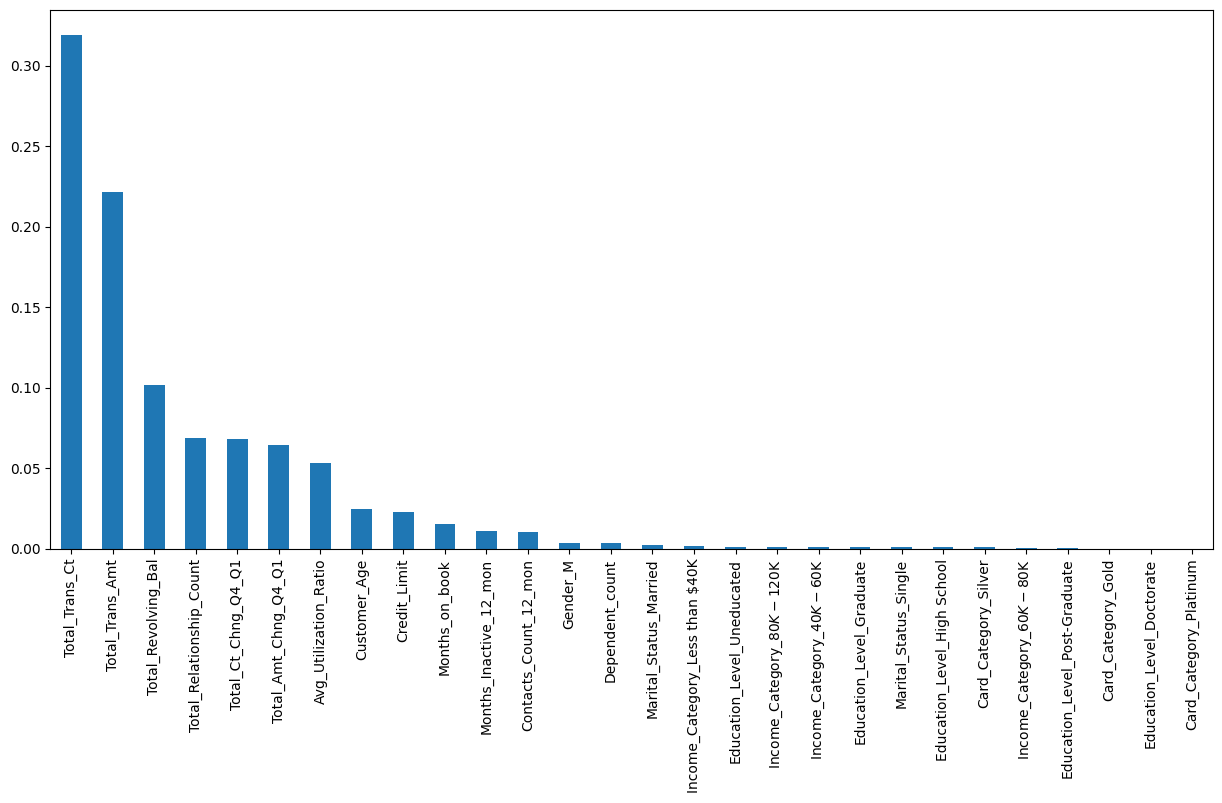

In [ ]:
# Plotting significance for bayes_cv_GB_under_ft_ABBase -  Gradient Boosting - Further Tuned Model with Adaboost classfier as base estimator
plt.figure(figsize=(15,7))
imp_features = pd.Series(index=X_train_under.columns,data=bayes_cv_GB_under_ft_ABBase.best_estimator_.feature_importances_)
imp_features.sort_values(ascending=False).plot.bar()

<Axes: >

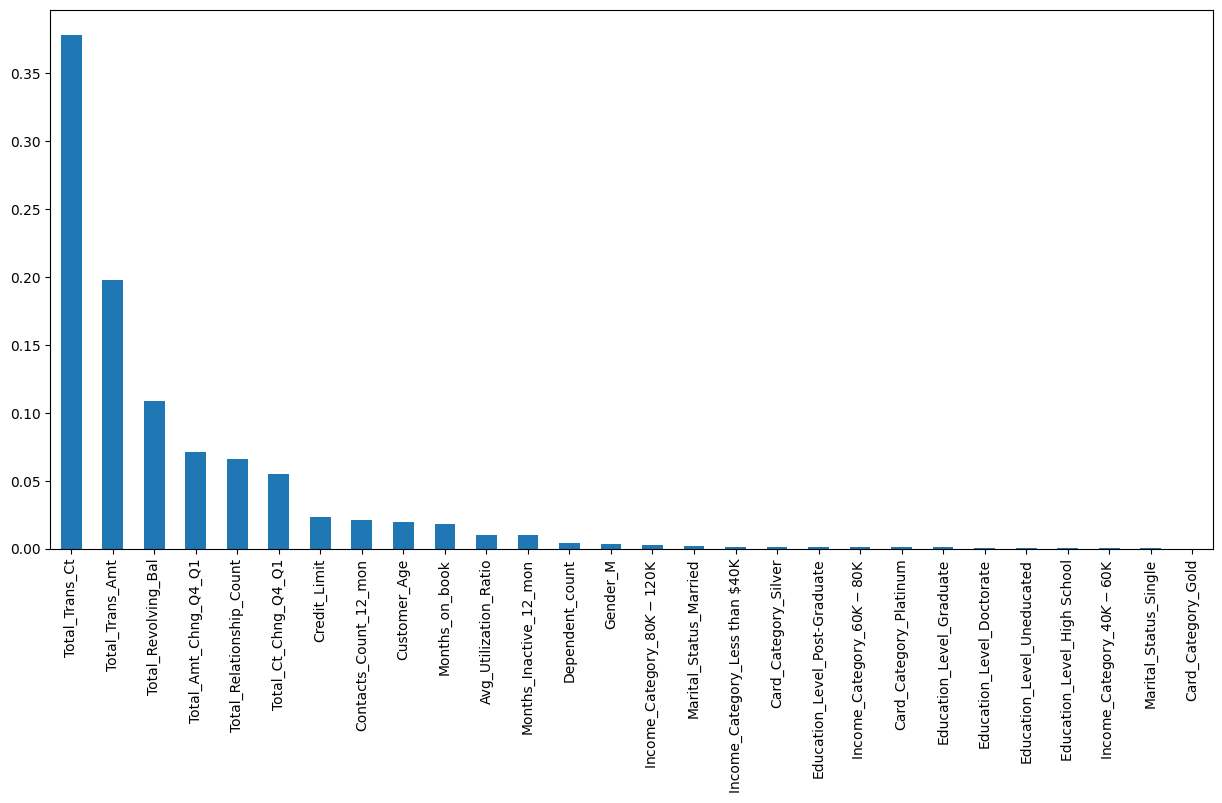

In [ ]:
# Plotting significance for bayes_cv_GB_under_ft_Nobase -  Gradient Boosting - Further Tuned Model with No Base estimator
plt.figure(figsize=(15,7))
imp_features = pd.Series(index=X_train_under.columns,data=bayes_cv_GB_under_ft_nobase.best_estimator_.feature_importances_)
imp_features.sort_values(ascending=False).plot.bar()

Features importances of either of the selected models[based on business decision] result in same importances.
* Total_Trans_Ct with leading of ~37.5%
* Total_Trans_Amt with next best at 20%
* Total_Revolving_Bal at ~11%
* Total_Relationship_Count/Total_Amt_Chng_Q4_Q1/Total_Ct_Chng_Q4_Q1 contributing to 6%-7%

### Trying to derive features and their cutoff values -> predicting the churn with top 4 features identified above

In [ ]:
# Extract decision trees from the Gradient Boosting model
estimators = bayes_cv_GB_under_ft_nobase.best_estimator_.estimators_

cutoff_values = []

# Iterate over each estimator in the ensemble
for stage_idx, tree_arr in enumerate(estimators):
    for tree_idx, tree in enumerate(tree_arr):
        tree_structure = tree.tree_
        feature = tree_structure.feature
        threshold = tree_structure.threshold

        # Extracting the feature index and threshold (cutoff value) for splits
        for node_idx in range(tree_structure.node_count):
            if feature[node_idx] != -2:  # Ignore leaf nodes
                feature_index = feature[node_idx]
                cutoff_threshold = threshold[node_idx]
                cutoff_values.append((stage_idx, tree_idx, feature_index, cutoff_threshold))

# Keep track of feature names for easier interpretation
feature_names = X_train_under.columns

stages, trees, feature_indexs, thresholds =[],[],[],[]
for stage, tree, feature_index, threshold in cutoff_values:
#df = pd.DataFrame({"Stage": cutoff_values})
  stages.append(stage)
  trees.append(tree)
  feature_indexs.append(feature_index)
  thresholds.append(threshold)
mydf = pd.DataFrame({"Stage":stages, "Column":[X_train_under.columns[idx] for idx in feature_indexs],"threshold": thresholds})
# Creating a DataFrame with stages of the estimator and columns , their cutoff values.

In [ ]:
# Finding the cutoff value of initial split for TOtal_Trans_Ct in the weak trees built by the ensemble
arr= mydf[mydf.Column=='Total_Trans_Ct'].reset_index().groupby(['Stage'])['index'].min().tolist()
mydf.loc[arr,:].threshold.value_counts().head(20)

,count
threshold,
59.500,27
52.500,22
44.500,19
55.500,15
43.500,15
61.500,14
63.500,12
58.500,10
28.500,9


**Observation on Total Transaction Count CUTOFF**
* Higher transaction counts in the range of 43-63 occurs more frequently acts as determining factor in predicting the churn of the customer

In [ ]:
mydf[mydf.Column=='Total_Relationship_Count'].head(20)

,Stage,Column,threshold
5,0,Total_Relationship_Count,3.500
35,1,Total_Relationship_Count,2.500
52,2,Total_Relationship_Count,4.500
56,2,Total_Relationship_Count,2.500
57,2,Total_Relationship_Count,2.500
75,3,Total_Relationship_Count,3.500
83,3,Total_Relationship_Count,2.500
85,3,Total_Relationship_Count,5.500
98,4,Total_Relationship_Count,2.500
128,5,Total_Relationship_Count,2.500


In [ ]:
# Finding the cutoff value of initial split for TOtal_Realtionship_Count in the weak trees built by the ensemble
arr= mydf[mydf.Column=='Total_Relationship_Count'].reset_index().groupby(['Stage'])['index'].min().tolist()
mydf.loc[arr,:].threshold.value_counts().head(30)

,count
threshold,
3.500,77
5.500,56
2.500,55
4.500,46
1.500,28
4.000,2
2.000,1


**Observation on Total Relationship Count CUTOFF**
* Total no. of relationship products in the range of 2-4 occurs more frequently acts as determining factor in predicting the churn of the customer

With other continuous numerical variables as influencing factors, its difficult to identify the range at which splits might occur that could help predicting the churn.

# Business Insights and Conclusions

* The model performance can be improved, especially in terms of recall, precision and the bank can use use the model for new customers once desired level of model performance is achieved.
* Top 4 influencing features which might help predicting the churn are      
   * Total_Trans_Ct with leading of ~37.5%
      * Higher transaction counts in the range of 43-63 occurs more frequently acts as determining factor in predicting the churn of the customer
      * With EDA, supporting the model prediction, Attrited customers transact less than the existing customers indicating signs of attrition and not using the card.
   * Total_Trans_Amt with next best at 20%
      * Total Transaction amount is higher for Existing customers while its lesser for Attrited customers.
   * Total_Revolving_Bal at ~11%
      * With EDA, Shows Attrited customers never had revolving balance. So, this, in addition to the model prediction can help zero in for future attrition. Total_revolving_bal is less for attrition customers with 500 USD or less. and it was higher than 500 existing customers.
   * Total_Relationship_Count/Total_Amt_Chng_Q4_Q1/Total_Ct_Chng_Q1_Q1 contributing to 6%-7%
      * Total no. of relationship products in the range of 2-4 occurs more frequently acts as determining factor in predicting the churn of the customer
      * For Attrited customers, Q4 count seems to be lesser than Q1 for attrited customers.
* Contacts_count_12Mon:  From EDA, Invariably more the number of contacts with the bank,higher the attrition.

**Recommendations**:
* We saw in our analysis that customers with a little or moderate transaction amount are more likely to churn. The bank can provide some offers or some cash back % with more the transaction amount.
* We saw in our analysis that customers with lower transaction counts are more likely to churn.
* TO entice customers into increasing both Transaction counts, and Transaction Amounts, The bank can establish some tieups with external vendors such as restaurants, Mobile companies, Retail Online/outlets vendors, Airlines, Electronics and providing Double,triple X points with a minimum on Transaction amt/ minimum transaction counts.
* Also, while noticing the deteriorating trend with above mentioned factors for a new customer, they can waive off any Card charges for a month or two with certain level of increase in either transaction count or transaction amount.
* We also saw in our analysis that more the relationship products that customer has, its less likely the customer would churn. Bank can run some attracting offers on the relationship products they offer while not compromising on the profit goal. Prospects of investment in stock portfolios and providing guidance and assitance will also help in raising the enagagement for realtionship products.
* Usually, Year end has lot of offers going on due to the nature of holidays, some new offers, new CD rates with higher % of interest kind of offers can help in customers engaging more with those products and have some engagement with Bank, which might ultimately lead to close relationship between bank and customer leading to lesser chances of attrition.
* Bank can work on improving the customer care - the contacts made by the customer with Bank. Invariably more the number of contacts with the bank,higher the attrition. It could basically be their complaints or dissatisfaction over some services which led to attrition.

***